In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import regex
import datetime
import matplotlib.pyplot as plt

import warnings
warnings.simplefilter(action='ignore')

# Show 2 decimals
pd.set_option('display.float_format', lambda x: '%.0f' % x)
#pd.options.display.float_format = '{:,.2f}'.format

#Butun kolon ve satirlari gormek icin
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)

# Set plot background
sns.set_theme(style="whitegrid")

# Euro sign €
#print ("%s"%(u"\N{euro sign}"))

In [2]:
auto = pd.read_csv("/Users/macbook/Desktop/csv_dosyalari/autoscout_data_2000.csv")
df = auto.copy()
df.head(2)

,location,url,make,model,short_description,price,mileage,gearbox,registration,fuel_type,power,seller,body_type,type,drivetrain,seats,doors,country_version,offer_number,warranty,Mileage,first_registration,production_date,general_inspection,last_service,full_service_history,non_smoker_vehicle,previous_owner,last_timing_belt_change,Power,Gearbox,engine_size,gears,cylinders,empty_weight,Fuel_type,fuel_consumption,co2_emissions,emission_class,emissions_sticker,\nComfort & Convenience\n,\nEntertainment & Media\n,\nSafety & Security\n,extras,\ncolour,\nmanufacturer_color,\npaint,upholstery_colour,upholstery
0,"LOON OP ZAND, NL",https://www.autoscout24.com/offers/audi-a3-2-0...,"\n,Audi ,\n","\n,A3,\n",2.0 FSI Ambition Pro Line,"[['\n', '€ 4,450.-', '\n']]","['', ['191,066 km']]","\n,Automatic,\n",08/2003,"\n,Gasoline,\n","110 kW (150 hp),","['\n', ['Dealer\n']]","\n,Compact,\n","\n,Used,\n","\n,Front,\n",\n5,\n3,"Country version,None",\nSJ-112-R,"\n,6 months,\n","[['\n'], ['']]",08/2003,None,05/2022,None,"\n,Yes,\n","\n,None,\n","[['\n'], ['None']]","[['\n'], ['None']]","\n,110 kW (150 hp),\n","\n,Automatic,\n","\n,1,984 cc,\n","\n,None,\n","\n,4,\n","\n,1,280 kg,\n","\n,Super 95,\n","\n,None,\n","['\n', [' ', ' ', ' '], '\n']","\n,Euro 4,\n","\n,None,\n","[['Air conditioning', 'Armrest', 'Automatic cl...","[['CD player', 'Radio']]","[['ABS', 'Alarm system', 'Central door lock', ...",[['Alloy wheels']],"\n4, Grey",None,"\npaint, Metallic","\nupholstery, Black","\n8, Cloth"
1,"HEERLEN, NL",https://www.autoscout24.com/offers/audi-a3-spo...,"\n,Audi ,\n","\n,A3,\n",Sportback 1.4 TFSI Ambiente/ECC/PDC//Lichtmeta...,"[['\n', '€ 12,950.-', '\n']]","['', ['94,758 km']]","\n,Automatic,\n",10/2013,"\n,Gasoline,\n","92 kW (125 hp),","['\n', ['Dealer\n']]","\n,Compact,\n","\n,Used,\n","\n,Front,\n",\n5,\n5,"Country version,None",\n809725,"\n,None,\n","[['\n'], ['']]",10/2013,None,None,None,"\n,Yes,\n","\n,None,\n","[['\n'], ['None']]","[['\n'], ['None']]","\n,92 kW (125 hp),\n","\n,Automatic,\n","\n,1,395 cc,\n","\n,None,\n","\n,4,\n","\n,1,200 kg,\n","\n,Gasoline,\n","['\n', ['4.9 l/100 km (comb.)', ' ', ' '], '\n']","\n,None,\n","\n,None,\n","\n,None,\n","[['Air conditioning', 'Automatic climate contr...","[['CD player', 'Radio']]","[['Alarm system', 'Central door lock', 'Centra...","[['Alloy wheels (16"")']]","\n4, White",None,None,"\nupholstery, Black","\n8, Cloth"


In [3]:
# Drop Duplicated Columns and Url column
df.drop(['url', 'Mileage', 'Power', 'gearbox'], axis=1, inplace= True)

df.columns

Index(['location', 'make', 'model', 'short_description', 'price', 'mileage',
       'registration', 'fuel_type', 'power', 'seller', 'body_type', 'type',
       'drivetrain', 'seats', 'doors', 'country_version', 'offer_number',
       'warranty', 'first_registration', 'production_date',
       'general_inspection', 'last_service', 'full_service_history',
       'non_smoker_vehicle', 'previous_owner', 'last_timing_belt_change',
       'Gearbox', 'engine_size', 'gears', 'cylinders', 'empty_weight',
       'Fuel_type', 'fuel_consumption', 'co2_emissions', 'emission_class',
       'emissions_sticker', '\nComfort & Convenience\n',
       '\nEntertainment & Media\n', '\nSafety & Security\n', 'extras',
       '\ncolour', '\nmanufacturer_color', '\npaint', ' upholstery_colour ',
       ' upholstery '],
      dtype='object')

# Cleansing 

In [4]:
# 1 - Rename and Reassign Columns (move unwanted characters from column names)
df.columns = ['location', 'make', 'model', 'short_description', 'price','mileage_km', 'registration', 'fuel_type', 'power', 'seller',
       'body_type', 'type', 'drivetrain', 'seats', 'doors', 'country_version','offer_number', 'warranty_months',  'first_registration',
       'production_date', 'general_inspection', 'last_service','full_service_history', 'non_smoker_vehicle', 'previous_owner',
       'last_timing_belt_change', 'Gearbox', 'engine_size_cc', 'gears','cylinders', 'empty_weight_kg', 'Fuel_type', 'fuel_consumption',
       'co2_emissions_g_km_comb', 'emission_class', 'emissions_sticker','Comfort & Convenience', 'Entertainment & Media',
       'Safety & Security', 'extras', 'colour', 'manufacturer_color','paint', 'upholstery_colour', 'upholstery']

In [5]:
# 2 - Removing unwanted Chracters from data
# Except these colums ====> location, short_description, registration, first_registration, general_inspection, Comfort & Convenience, Entertainment & Media, Safety & Security, extras
clmns = ['make', 'model', 'price','mileage_km', 'fuel_type', 'power', 'seller',
       'body_type', 'type', 'drivetrain', 'seats', 'doors', 'country_version','offer_number', 'warranty_months',
       'production_date', 'last_service','full_service_history', 'non_smoker_vehicle', 'previous_owner',
       'last_timing_belt_change', 'Gearbox', 'engine_size_cc', 'gears','cylinders', 'empty_weight_kg', 'Fuel_type', 'fuel_consumption',
       'co2_emissions_g_km_comb', 'emission_class', 'emissions_sticker',
       'colour', 'manufacturer_color','paint', 'upholstery_colour', 'upholstery']

for column in clmns:
    df[column] = df[column].str.replace(r'\W', '')
    
df.head(2)

,location,make,model,short_description,price,mileage_km,registration,fuel_type,power,seller,body_type,type,drivetrain,seats,doors,country_version,offer_number,warranty_months,first_registration,production_date,general_inspection,last_service,full_service_history,non_smoker_vehicle,previous_owner,last_timing_belt_change,Gearbox,engine_size_cc,gears,cylinders,empty_weight_kg,Fuel_type,fuel_consumption,co2_emissions_g_km_comb,emission_class,emissions_sticker,Comfort & Convenience,Entertainment & Media,Safety & Security,extras,colour,manufacturer_color,paint,upholstery_colour,upholstery
0,"LOON OP ZAND, NL",Audi,A3,2.0 FSI Ambition Pro Line,n4450n,191066km,08/2003,Gasoline,110kW150hp,nDealern,Compact,Used,Front,5,3,CountryversionNone,SJ112R,6months,08/2003,None,05/2022,None,Yes,None,nNone,nNone,Automatic,1984cc,None,4,1280kg,Super95,None,nn,Euro4,None,"[['Air conditioning', 'Armrest', 'Automatic cl...","[['CD player', 'Radio']]","[['ABS', 'Alarm system', 'Central door lock', ...",[['Alloy wheels']],4Grey,None,paintMetallic,upholsteryBlack,8Cloth
1,"HEERLEN, NL",Audi,A3,Sportback 1.4 TFSI Ambiente/ECC/PDC//Lichtmeta...,n12950n,94758km,10/2013,Gasoline,92kW125hp,nDealern,Compact,Used,Front,5,5,CountryversionNone,809725,None,10/2013,None,None,None,Yes,None,nNone,nNone,Automatic,1395cc,None,4,1200kg,Gasoline,n49l100kmcombn,None,None,None,"[['Air conditioning', 'Automatic climate contr...","[['CD player', 'Radio']]","[['Alarm system', 'Central door lock', 'Centra...","[['Alloy wheels (16"")']]",4White,None,None,upholsteryBlack,8Cloth


In [6]:
# 3 - Delete NL from Location
df.location = df['location'].str.replace(', NL', '').str.upper()
df.location = df['location'].str.replace('.', '').str.replace('5', '').str.replace('6', '').str.replace(r'\+318429897', '')
df.location = df.location.replace('', np.NaN)

# Delete n from columns
L01 = ['seller', 'price', 'previous_owner', 'last_timing_belt_change', 'fuel_consumption', 'co2_emissions_g_km_comb']
for i in L01:
    df[i] = df[i].str.replace('n', '')

# Model nNonen to np.NaN
df.model = df.model.str.replace('nNonen', '').replace('', np.NaN)

# Delete [ ] from L02    
L02 = ['Comfort & Convenience', 'Entertainment & Media', 'Safety & Security', 'extras']
for i in L02:
    df[i] = df[i].str.replace('[', '')
    df[i] = df[i].str.replace(']', '')
    
# delete 4 from colour
df['colour'] = df['colour'].str.replace('4', '')

# Delete paint from paint column
df['paint'] = df['paint'].str.replace('paint', '')

# Delete upholstery from upholstery_colour
df['upholstery_colour'] = df['upholstery_colour'].str.replace('upholstery', '')

# Delete 8 from upholstery
df['upholstery'] = df['upholstery'].str.replace('8', '')

df.head(2)

,location,make,model,short_description,price,mileage_km,registration,fuel_type,power,seller,body_type,type,drivetrain,seats,doors,country_version,offer_number,warranty_months,first_registration,production_date,general_inspection,last_service,full_service_history,non_smoker_vehicle,previous_owner,last_timing_belt_change,Gearbox,engine_size_cc,gears,cylinders,empty_weight_kg,Fuel_type,fuel_consumption,co2_emissions_g_km_comb,emission_class,emissions_sticker,Comfort & Convenience,Entertainment & Media,Safety & Security,extras,colour,manufacturer_color,paint,upholstery_colour,upholstery
0,LOON OP ZAND,Audi,A3,2.0 FSI Ambition Pro Line,4450,191066km,08/2003,Gasoline,110kW150hp,Dealer,Compact,Used,Front,5,3,CountryversionNone,SJ112R,6months,08/2003,None,05/2022,None,Yes,None,Noe,Noe,Automatic,1984cc,None,4,1280kg,Super95,Noe,,Euro4,None,"'Air conditioning', 'Armrest', 'Automatic clim...","'CD player', 'Radio'","'ABS', 'Alarm system', 'Central door lock', 'C...",'Alloy wheels',Grey,None,Metallic,Black,Cloth
1,HEERLEN,Audi,A3,Sportback 1.4 TFSI Ambiente/ECC/PDC//Lichtmeta...,12950,94758km,10/2013,Gasoline,92kW125hp,Dealer,Compact,Used,Front,5,5,CountryversionNone,809725,None,10/2013,None,None,None,Yes,None,Noe,Noe,Automatic,1395cc,None,4,1200kg,Gasoline,49l100kmcomb,Noe,None,None,"'Air conditioning', 'Automatic climate control...","'CD player', 'Radio'","'Alarm system', 'Central door lock', 'Central ...","'Alloy wheels (16"")'",White,None,None,Black,Cloth


In [7]:
df['mileage_km'] = df['mileage_km'].str.replace('km', '')
df['warranty_months'] = df['warranty_months'].str.replace('months', '')
df['engine_size_cc'] = df['engine_size_cc'].str.replace('cc', '')
df['empty_weight_kg'] = df['empty_weight_kg'].str.replace('kg', '')
df['country_version'] = df['country_version'].str.replace('Countryversion', '')
df['co2_emissions_g_km_comb'] = df['co2_emissions_g_km_comb'].str.replace('gkmcomb', '')
df.head(1)

,location,make,model,short_description,price,mileage_km,registration,fuel_type,power,seller,body_type,type,drivetrain,seats,doors,country_version,offer_number,warranty_months,first_registration,production_date,general_inspection,last_service,full_service_history,non_smoker_vehicle,previous_owner,last_timing_belt_change,Gearbox,engine_size_cc,gears,cylinders,empty_weight_kg,Fuel_type,fuel_consumption,co2_emissions_g_km_comb,emission_class,emissions_sticker,Comfort & Convenience,Entertainment & Media,Safety & Security,extras,colour,manufacturer_color,paint,upholstery_colour,upholstery
0,LOON OP ZAND,Audi,A3,2.0 FSI Ambition Pro Line,4450,191066,08/2003,Gasoline,110kW150hp,Dealer,Compact,Used,Front,5,3,None,SJ112R,6,08/2003,None,05/2022,None,Yes,None,Noe,Noe,Automatic,1984,None,4,1280,Super95,Noe,,Euro4,None,"'Air conditioning', 'Armrest', 'Automatic clim...","'CD player', 'Radio'","'ABS', 'Alarm system', 'Central door lock', 'C...",'Alloy wheels',Grey,None,Metallic,Black,Cloth


In [8]:
df1 = df.copy()

L03 = ['price', 'mileage_km','engine_size_cc', 'empty_weight_kg', 'seats', 'doors', 'warranty_months', 'cylinders', 'co2_emissions_g_km_comb']
for i in L03:
    df[i] = df[i].replace(['None', 'Noe', 'Yes', 'Automatic', 'Manual', 'Semiautomatic'], np.NaN)
    df[i] = df[i].replace('', np.NaN)
    df[i] = df[i].astype(float)

df.describe().T

,count,mean,std,min,25%,50%,75%,max
price,69534,24369,468620,1,8945,17450,28935,123456789
mileage_km,70951,107148,88475,1,30194,95615,163794,2215714
seats,65562,5,1,1,5,5,5,14
doors,69790,5,1,1,4,5,5,6
warranty_months,24004,8,9,1,6,6,6,84
engine_size_cc,65265,1771,702,0,1390,1598,1995,65535
cylinders,64809,4,1,1,4,4,4,12
empty_weight_kg,69500,1433,321,1,1234,1382,1591,4200
co2_emissions_g_km_comb,52190,129,68,0,105,133,164,5900


In [9]:
L04 = ['power_kw', 'power_hp']
df[L04] = df.power.str.split('kW', expand= True)   
df['power_hp'] = df['power_hp'].str.replace('hp', '').replace('None', np.NaN) 
df['power_kw'] = df['power_kw'].str.replace('kg', '').replace('None', np.NaN)     
df[L04] = df[L04].astype(float)
df = df.drop(['power'], axis=1)
df.head(1)

,location,make,model,short_description,price,mileage_km,registration,fuel_type,seller,body_type,type,drivetrain,seats,doors,country_version,offer_number,warranty_months,first_registration,production_date,general_inspection,last_service,full_service_history,non_smoker_vehicle,previous_owner,last_timing_belt_change,Gearbox,engine_size_cc,gears,cylinders,empty_weight_kg,Fuel_type,fuel_consumption,co2_emissions_g_km_comb,emission_class,emissions_sticker,Comfort & Convenience,Entertainment & Media,Safety & Security,extras,colour,manufacturer_color,paint,upholstery_colour,upholstery,power_kw,power_hp
0,LOON OP ZAND,Audi,A3,2.0 FSI Ambition Pro Line,4450,191066,08/2003,Gasoline,Dealer,Compact,Used,Front,5,3,None,SJ112R,6,08/2003,None,05/2022,None,Yes,None,Noe,Noe,Automatic,1984,None,4,1280,Super95,Noe,NaN,Euro4,None,"'Air conditioning', 'Armrest', 'Automatic clim...","'CD player', 'Radio'","'ABS', 'Alarm system', 'Central door lock', 'C...",'Alloy wheels',Grey,None,Metallic,Black,Cloth,110,150


# Dulpicated

In [10]:
df.shape

(71104, 46)

In [11]:
df.duplicated().sum()

2012

In [12]:
df.loc[df.duplicated(), :].head(2)

,location,make,model,short_description,price,mileage_km,registration,fuel_type,seller,body_type,type,drivetrain,seats,doors,country_version,offer_number,warranty_months,first_registration,production_date,general_inspection,last_service,full_service_history,non_smoker_vehicle,previous_owner,last_timing_belt_change,Gearbox,engine_size_cc,gears,cylinders,empty_weight_kg,Fuel_type,fuel_consumption,co2_emissions_g_km_comb,emission_class,emissions_sticker,Comfort & Convenience,Entertainment & Media,Safety & Security,extras,colour,manufacturer_color,paint,upholstery_colour,upholstery,power_kw,power_hp
638,WOMMELS,Audi,A3,1.6 FSI Ambiente,2750,289500,11/2006,Gasoline,Privateseller,Compact,Used,None,5,4,None,None,NaN,11/2006,None,06/2022,None,Yes,None,Noe,Noe,Manual,1598,6,4,1240,Gasoline,67l100kmcomb89l100kmcity54l100kmcoutry,161,Euro4,None,"'Air conditioning', 'Automatic climate control...","'Hands-free equipment', 'On-board computer', '...","'Central door lock', 'Central door lock with r...","'Alloy wheels (16"")', 'Automatically dimming i...",Blue,None,None,None,None,85,116
1199,NAARDEN,Audi,TTS,Roadster 2.0 TFSI quattro Hoofdruimteverwarmin...,49900,5076,10/2017,Gasoline,Dealer,Convertible,Used,4WD,2,2,None,PV399Z,6,10/2017,None,New,None,Yes,None,Noe,Noe,Automatic,1984,6,4,1445,Super95,69l100kmcomb84l100kmcity6l100kmcoutry,159,Euro6,None,"'Air conditioning', 'Cruise control', 'Electri...","'Digital cockpit', 'Hands-free equipment', 'Ra...","'ABS', 'Alarm system', 'Bi-Xenon headlights', ...","'Alloy wheels (18"")', 'Automatically dimming i...",Black,None,Metallic,Black,Fullleather,228,310


In [13]:
print(df.shape)
df.drop_duplicates(inplace= True)

(71104, 46)


In [14]:
df.shape

(69092, 46)

In [15]:
df.duplicated().sum()

0

### Price Null DataFrame

In [16]:
# Find the rows which have no price

price_null_tf = (df['price'].isnull())
price_null = (df[price_null_tf])
price_null.shape

(1523, 46)

### Drop Empty Price, Make , Year Columns

In [17]:
df.shape

(69092, 46)

In [18]:
#df[['price', 'make', 

In [19]:
df.dropna(subset=['price'], inplace= True)
df.shape

(67569, 46)

## DF_Dates 

In [20]:
L05 = ['registration', 'first_registration', 'general_inspection']
for i in L05:
    df[i] = pd.to_datetime(df[i], format= '%m/%Y', errors= 'coerce')

df['production_date'] = pd.to_datetime(df['production_date'], format= '%Y', errors= 'coerce')

# Creating new Features df_dates
df_dates = pd.DataFrame({'registration':  df.registration,
                         'first_registration' : df.first_registration,
                         'production_date' : df.production_date,
                         'general_inspection' : df.general_inspection,
                        'last_timing_belt_change' : df.last_timing_belt_change})

L05 = ['registration', 'first_registration', 'general_inspection']
for i in L05:
    df_dates[i] = pd.to_datetime(df_dates[i], format= '%m/%Y', errors= 'coerce')

df_dates['production_date'] = pd.to_datetime(df_dates['production_date'], format= '%Y', errors= 'coerce')
df_dates['last_timing_belt_change'] = pd.to_datetime(df_dates['last_timing_belt_change'], format= '%m%Y', errors= 'coerce')
df_dates.head()

,registration,first_registration,production_date,general_inspection,last_timing_belt_change
0,2003-08-01,2003-08-01,NaT,2022-05-01,NaT
1,2013-10-01,2013-10-01,NaT,NaT,NaT
2,2013-05-01,2013-05-01,NaT,2022-03-01,NaT
3,2015-06-01,2015-06-01,2015-01-01,NaT,NaT
4,2015-10-01,2015-10-01,NaT,NaT,NaT


In [21]:
df2 = df.copy()

In [22]:
# Add year Column !!!!!!
pd.options.display.float_format = '{:.0f}'.format 
df.insert(4, 'year', df.registration.dt.year, True )
#Add make-model
df.insert(3, 'make_model', (df['make'].astype(str) +"-"+ df["model"].astype(str)), True)
df.head(2)

,location,make,model,make_model,short_description,year,price,mileage_km,registration,fuel_type,seller,body_type,type,drivetrain,seats,doors,country_version,offer_number,warranty_months,first_registration,production_date,general_inspection,last_service,full_service_history,non_smoker_vehicle,previous_owner,last_timing_belt_change,Gearbox,engine_size_cc,gears,cylinders,empty_weight_kg,Fuel_type,fuel_consumption,co2_emissions_g_km_comb,emission_class,emissions_sticker,Comfort & Convenience,Entertainment & Media,Safety & Security,extras,colour,manufacturer_color,paint,upholstery_colour,upholstery,power_kw,power_hp
0,LOON OP ZAND,Audi,A3,Audi-A3,2.0 FSI Ambition Pro Line,2003,4450,191066,2003-08-01,Gasoline,Dealer,Compact,Used,Front,5,3,None,SJ112R,6,2003-08-01,NaT,2022-05-01,None,Yes,None,Noe,Noe,Automatic,1984,None,4,1280,Super95,Noe,NaN,Euro4,None,"'Air conditioning', 'Armrest', 'Automatic clim...","'CD player', 'Radio'","'ABS', 'Alarm system', 'Central door lock', 'C...",'Alloy wheels',Grey,None,Metallic,Black,Cloth,110,150
1,HEERLEN,Audi,A3,Audi-A3,Sportback 1.4 TFSI Ambiente/ECC/PDC//Lichtmeta...,2013,12950,94758,2013-10-01,Gasoline,Dealer,Compact,Used,Front,5,5,None,809725,NaN,2013-10-01,NaT,NaT,None,Yes,None,Noe,Noe,Automatic,1395,None,4,1200,Gasoline,49l100kmcomb,NaN,None,None,"'Air conditioning', 'Automatic climate control...","'CD player', 'Radio'","'Alarm system', 'Central door lock', 'Central ...","'Alloy wheels (16"")'",White,None,None,Black,Cloth,92,125


### Combine Make Column to Make_Counrty Column

In [23]:
german = ['Audi', 'MercedesBenz', 'BMW', 'Volkswagen', 'Opel', 'Skoda']
japan = ['Toyota', 'Honda', 'Mazda']
sweden = ['Volvo']
france = ['Renault', 'Peugeot', 'Citroen']
america = ['Ford', 'Chevrolet', 'Tesla']
south_korea = ['Kia', 'Hyundai']
italy = ['Fiat']
romanian = ['Dacia']

conditions = [ 
    (df.make.isin(german)),
    (df.make.isin(japan)),
    (df.make.isin(sweden)),
    (df.make.isin(france)),
    (df.make.isin(america)),
    (df.make.isin(south_korea)),
    (df.make.isin(italy)),
    (df.make.isin(romanian)),
]

values = ['German', 'Japan', 'Sweden', 'France', 'America', 'South_Korea', 'Italy', 'Romanian']

df['make_country'] = np.select(conditions, values)
df.tail(1)

,location,make,model,make_model,short_description,year,price,mileage_km,registration,fuel_type,seller,body_type,type,drivetrain,seats,doors,country_version,offer_number,warranty_months,first_registration,production_date,general_inspection,last_service,full_service_history,non_smoker_vehicle,previous_owner,last_timing_belt_change,Gearbox,engine_size_cc,gears,cylinders,empty_weight_kg,Fuel_type,fuel_consumption,co2_emissions_g_km_comb,emission_class,emissions_sticker,Comfort & Convenience,Entertainment & Media,Safety & Security,extras,colour,manufacturer_color,paint,upholstery_colour,upholstery,power_kw,power_hp,make_country
71103,SOESTERBERG,Volvo,S60,Volvo-S60,"2.4 Airco, Cruise Control, Stuurbekrachtiging",2001,944,404758,2001-09-01,LPG,Dealer,Sedan,Used,Front,5,4,None,26HNLS,NaN,2001-09-01,NaT,NaT,None,None,None,Noe,Noe,Manual,2435,5,5,1488,LiquidpetroleumgasLPG,84l100kmcomb116l100kmcity65l100kmcoutry,207,Euro3,None,"'Air conditioning', 'Armrest', 'Automatic clim...","'On-board computer', 'Radio'","'ABS', 'Alarm system', 'Central door lock', 'C...",'Alloy wheels',Grey,None,Metallic,None,Partleather,104,141,Sweden


In [24]:
df.price.isnull().sum()

0

# Wrong Values to NaN

In [25]:
# Year 2025 and 2028 to np.nan
df['year'] = df['year'].replace([2025, 2028], np.NaN)
df.insert(4, 'age', (2022 - df.year), True)
df.head(2)

,location,make,model,make_model,age,short_description,year,price,mileage_km,registration,fuel_type,seller,body_type,type,drivetrain,seats,doors,country_version,offer_number,warranty_months,first_registration,production_date,general_inspection,last_service,full_service_history,non_smoker_vehicle,previous_owner,last_timing_belt_change,Gearbox,engine_size_cc,gears,cylinders,empty_weight_kg,Fuel_type,fuel_consumption,co2_emissions_g_km_comb,emission_class,emissions_sticker,Comfort & Convenience,Entertainment & Media,Safety & Security,extras,colour,manufacturer_color,paint,upholstery_colour,upholstery,power_kw,power_hp,make_country
0,LOON OP ZAND,Audi,A3,Audi-A3,19,2.0 FSI Ambition Pro Line,2003,4450,191066,2003-08-01,Gasoline,Dealer,Compact,Used,Front,5,3,None,SJ112R,6,2003-08-01,NaT,2022-05-01,None,Yes,None,Noe,Noe,Automatic,1984,None,4,1280,Super95,Noe,NaN,Euro4,None,"'Air conditioning', 'Armrest', 'Automatic clim...","'CD player', 'Radio'","'ABS', 'Alarm system', 'Central door lock', 'C...",'Alloy wheels',Grey,None,Metallic,Black,Cloth,110,150,German
1,HEERLEN,Audi,A3,Audi-A3,9,Sportback 1.4 TFSI Ambiente/ECC/PDC//Lichtmeta...,2013,12950,94758,2013-10-01,Gasoline,Dealer,Compact,Used,Front,5,5,None,809725,NaN,2013-10-01,NaT,NaT,None,Yes,None,Noe,Noe,Automatic,1395,None,4,1200,Gasoline,49l100kmcomb,NaN,None,None,"'Air conditioning', 'Automatic climate control...","'CD player', 'Radio'","'Alarm system', 'Central door lock', 'Central ...","'Alloy wheels (16"")'",White,None,None,Black,Cloth,92,125,German


# PRICE (Last One)

In [26]:
# Wrong Price to NaN

# high price to NaN
#index_list = [1406, 22706, 23072, 66537, 71027]
#df.loc[index_list, 'price'] = np.NaN

# low price to NaN


print(df.price.max())
df.price.isnull().sum()

123456789.0


0

In [27]:
list_short = ['make', 'model', 'price', 'year','age','mileage_km']
df.loc[(df.price <=500) & (df.mileage_km <=100000) , list_short]

,make,model,price,year,age,mileage_km
14588,Ford,KaKa,499,2001,21,31949
17729,Ford,Transit,275,2017,5,77521
50269,Kia,Picanto,239,2022,0,10
52116,Kia,eNiro,464,2022,0,10
52122,Kia,eNiro,484,2022,0,10


In [28]:
df.loc[(df.price <=5000) & (df.mileage_km <=10000) , list_short]

,make,model,price,year,age,mileage_km
9896,BMW,116,4500,2006,16,186
23050,MercedesBenz,Vito,4700,2007,15,250
23882,MercedesBenz,300,2700,2000,22,3000
32155,Volkswagen,Golf,4900,2010,12,1
32160,Volkswagen,Polo,4900,2010,12,1
50269,Kia,Picanto,239,2022,0,10
52113,Kia,EV6,579,2021,1,10
52116,Kia,eNiro,464,2022,0,10
52118,Kia,eNiro,539,2022,0,10
52122,Kia,eNiro,484,2022,0,10


# Missing Value Make

### Make, Model, Mileage_Km

In [29]:
df.loc[(df.model.isnull()) & (df.year.isnull()) & (df.mileage_km.isnull())].shape

(0, 50)

In [30]:
df.loc[(df.model.isnull()) & (df.year.isnull())].shape

(8, 50)

In [31]:
df.loc[(df.model.isnull()) & (df.mileage_km.isnull())].shape

(0, 50)

In [32]:
df.loc[(df.year.isnull()) & (df.mileage_km.isnull())].shape

(5, 50)

In [33]:
df[['model', 'year', 'mileage_km']].isnull().sum()

model           8
year           48
mileage_km    150
dtype: int64

In [34]:
print(df.shape)
df.dropna(subset=['model', 'year','mileage_km'], inplace= True)
df.shape  # 193 index Deleted

(67569, 50)


(67376, 50)

# Save

In [35]:
df.to_csv('auto_02.csv')

# DF_Mercedes_Bmw

In [36]:
L01 = ['MercedesBenz', 'BMW']
df_mer_bmw = df.loc[df.make.isin(L01), :]
df_mer_bmw.to_csv('df_mer_bmw.csv')
df_mer_bmw.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 13956 entries, 6394 to 25486
Data columns (total 50 columns):
 #   Column                   Non-Null Count  Dtype         
---  ------                   --------------  -----         
 0   location                 13955 non-null  object        
 1   make                     13956 non-null  object        
 2   model                    13956 non-null  object        
 3   make_model               13956 non-null  object        
 4   age                      13956 non-null  float64       
 5   short_description        13872 non-null  object        
 6   year                     13956 non-null  float64       
 7   price                    13956 non-null  float64       
 8   mileage_km               13956 non-null  float64       
 9   registration             13956 non-null  datetime64[ns]
 10  fuel_type                13956 non-null  object        
 11  seller                   13956 non-null  object        
 12  body_type                1395

In [37]:
df_mer_bmw.make_model.value_counts().sort_values().head()

MercedesBenz-S300     1
MercedesBenz-220      1
MercedesBenz-E420     1
MercedesBenz-S250     1
MercedesBenz-CE220    1
Name: make_model, dtype: int64

# ML (MERCEDES_BMW)

In [38]:
# Drop the Values smaller than 30 

In [620]:
df_mer_bmw = pd.read_csv('df_mer_bmw.csv')
df_mer_bmw.drop('Unnamed: 0', axis=1, inplace=True)

In [621]:
small_30_tf = (df_mer_bmw.make_model.value_counts() < 30)
small_30_tf[small_30_tf][:5]

BMW-645              True
BMW-430              True
BMW-X4               True
MercedesBenz-A220    True
BMW-135              True
Name: make_model, dtype: bool

In [622]:
list(small_30_tf[:5].index)

['BMW-320', 'BMW-X5', 'MercedesBenz-C180', 'BMW-218', 'BMW-330']

In [623]:
index_criteria = small_30_tf[small_30_tf].index[:10]

In [624]:
small_30_tf[small_30_tf].shape

(203,)

In [625]:
filt = df['make_model'].isin(list(small_30_tf[small_30_tf].index))
df.loc[filt].index

Int64Index([], dtype='int64')

In [626]:
# All steps in one code line
small_30_tf = (df_mer_bmw.make_model.value_counts() < 30)

index_criteria = small_30_tf[small_30_tf].index

list_criteria = list(index_criteria)

criteria = df_mer_bmw['make_model'].map(lambda x :  x in list_criteria) # criteria = df.make_model.isin(list_criteria)

df_mer_bmw[criteria].index

Int64Index([    5,     6,    16,   115,   147,   185,   191,   193,   202,
              204,
            ...
            13718, 13720, 13770, 13775, 13788, 13797, 13923, 13936, 13945,
            13952],
           dtype='int64', length=1561)

In [627]:
df_mer_bmw.shape

(13956, 50)

In [628]:
# Drop less than 30 Values in DF

df_mer_bmw.drop(index= (df_mer_bmw[criteria].index), inplace= True)
df_mer_bmw.shape

(12395, 50)

In [629]:
df = df_mer_bmw.copy()

### Drop The Values Model == Others

In [49]:
df.loc[df.model == 'Others', :].index
df.drop(index= (df.loc[df.model == 'Others', :].index), inplace= True)
df.shape

(12135, 50)

### Make Co2 Column np.NaN while the Fueltype = L01

In [50]:
L01= ['Gasoline', 'Diesel', 'ElectricGasoline', 'ElectricDiesel', 'LPG', 'CNG', 'Others']
index_01 = df.loc[(df.fuel_type.isin(L01)) & (df.co2_emissions_g_km_comb == 0), ['make_model', 'fuel_type', 'co2_emissions_g_km_comb']].index
index_01

Int64Index([   13,    18,   146,   156,   172,   330,   491,   551,   557,
              564,
            ...
            13903, 13904, 13905, 13906, 13907, 13909, 13911, 13915, 13918,
            13922],
           dtype='int64', length=1086)

In [51]:
df.co2_emissions_g_km_comb.loc[index_01] = np.NaN
df.co2_emissions_g_km_comb.loc[index_01][:5]

13    NaN
18    NaN
146   NaN
156   NaN
172   NaN
Name: co2_emissions_g_km_comb, dtype: float64

In [52]:
df.shape

(12135, 50)

### Drop CNG Fuel Type

In [53]:
index_ = df.loc[df.fuel_type == 'CNG'].index

df.drop(index_, axis=0, inplace= True)

df.shape

(12133, 50)

In [54]:
df.fuel_type.value_counts()

Gasoline            6566
Diesel              2856
ElectricGasoline    1813
Electric             774
ElectricDiesel        90
LPG                   33
Others                 1
Name: fuel_type, dtype: int64

In [55]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
age,12133,8,6,0,4,7,12,25
year,12133,2014,6,1997,2010,2015,2018,2022
price,12133,27474,23641,600,11250,20485,34900,179659
mileage_km,12133,120908,90688,1,47009,112005,178242,827190
seats,11403,5,1,2,5,5,5,9
doors,11898,4,1,2,4,5,5,6
warranty_months,3204,9,8,1,6,6,6,24
engine_size_cc,11268,2056,844,0,1595,1995,2143,65535
cylinders,11166,4,1,1,4,4,4,8
empty_weight_kg,11799,1571,307,112,1335,1480,1720,3960


### Engine Size Control
### np.NaN wich engine size > 6000 

In [56]:
df.engine_size_cc.value_counts().sort_index(ascending= False).head()

65535    1
8592     3
5462     1
5461     2
5000     1
Name: engine_size_cc, dtype: int64

In [57]:
L01 = df.loc[df.engine_size_cc > 6000].index
L01

Int64Index([11711, 11893, 12012, 12708], dtype='int64')

In [58]:
df.engine_size_cc.loc[L01] = np.NaN

df.engine_size_cc.loc[L01]

11711   NaN
11893   NaN
12012   NaN
12708   NaN
Name: engine_size_cc, dtype: float64

### Mileage Control

In [59]:
df.loc[(df.mileage_km < 2500) & (df.year < 2020) , ['make_model', 'year', 'mileage_km']]

,make_model,year,mileage_km
792,BMW-640,2011,1
3343,BMW-116,2006,186
3493,BMW-M3,2017,345
4335,BMW-116,2014,1
4732,BMW-X3,2012,1
5086,BMW-525,2005,328
5582,BMW-525,2010,1
5585,BMW-520,2013,1
9517,MercedesBenz-C180,2008,1
11608,MercedesBenz-Vito,2007,250


In [60]:
df.loc[(df.mileage_km < 2500) & (df.year < 2020) , ['make_model', 'year']].values

array([['BMW-640', 2011.0],
       ['BMW-116', 2006.0],
       ['BMW-M3', 2017.0],
       ['BMW-116', 2014.0],
       ['BMW-X3', 2012.0],
       ['BMW-525', 2005.0],
       ['BMW-525', 2010.0],
       ['BMW-520', 2013.0],
       ['MercedesBenz-C180', 2008.0],
       ['MercedesBenz-Vito', 2007.0],
       ['MercedesBenz-E300', 2011.0],
       ['MercedesBenz-E200', 2015.0],
       ['MercedesBenz-E200', 2010.0]], dtype=object)

### Assign df.mliege_km to MEAN  less than 2500 km and year 2020

In [61]:
index_01 = df.loc[(df.mileage_km < 2500) & (df.year < 2020) , ['make_model', 'year']].index
index_01

Int64Index([792, 3343, 3493, 4335, 4732, 5086, 5582, 5585, 9517, 11608, 11706,
            11827, 12094],
           dtype='int64')

In [62]:
for i in index_01:
    mm = df.loc[i][3]
    yy = df.loc[i][6]
    mileage_mean = df.loc[(df.make_model == (df.loc[792][3])) & (df.year == (df.loc[792][6]))].mileage_km.mean()
    df.mileage_km.loc[i] = int(mileage_mean)
    print(mm, int(yy), int(mileage_mean))

BMW-640 2011 132658
BMW-116 2006 144718
BMW-M3 2017 144718
BMW-116 2014 144718
BMW-X3 2012 144718
BMW-525 2005 144718
BMW-525 2010 144718
BMW-520 2013 144718
MercedesBenz-C180 2008 144718
MercedesBenz-Vito 2007 144718
MercedesBenz-E300 2011 144718
MercedesBenz-E200 2015 144718
MercedesBenz-E200 2010 144718


In [63]:
df.loc[index_01, ['mileage_km']][:3]

,mileage_km
792,132658
3343,144718
3493,144718


### Control Doors

In [64]:
df.doors.value_counts()

5    7446
4    2746
2    1498
3     202
6       6
Name: doors, dtype: int64

In [65]:
df.loc[df.doors == 6]

,location,make,model,make_model,age,short_description,year,price,mileage_km,registration,fuel_type,seller,body_type,type,drivetrain,seats,doors,country_version,offer_number,warranty_months,first_registration,production_date,general_inspection,last_service,full_service_history,non_smoker_vehicle,previous_owner,last_timing_belt_change,Gearbox,engine_size_cc,gears,cylinders,empty_weight_kg,Fuel_type,fuel_consumption,co2_emissions_g_km_comb,emission_class,emissions_sticker,Comfort & Convenience,Entertainment & Media,Safety & Security,extras,colour,manufacturer_color,paint,upholstery_colour,upholstery,power_kw,power_hp,make_country
6450,AMSTERDAM DUIVENDRECHT,BMW,X3,BMW-X3,1,Xdrive30e,2021,67900,6774,2021-09-01,ElectricGasoline,Dealer,OffRoadPickup,Used,None,NaN,6,None,9H75423,24,2021-09-01,NaN,NaN,None,None,None,Noe,Noe,Automatic,NaN,8,NaN,NaN,Super95,Noe,NaN,None,None,"'Air conditioning', 'Automatic climate control...","'Digital cockpit', 'Digital radio', 'Radio', '...","'Adaptive headlights', 'Alarm system', 'Emerge...","'Automatically dimming interior mirror', 'Emer...",Grey,None,Metallic,Other,Partleather,NaN,NaN,German
10428,SPAUBEEK,MercedesBenz,C300,MercedesBenz-C300,7,C300 4MATIC,2015,29900,55460,2015-07-01,Gasoline,Dealer,Other,Used,4WD,NaN,6,Netherlands,2578099,6,2015-07-01,2015-01-01,2023-09-01,None,None,Yes,Noe,Noe,Automatic,1991,None,NaN,1780,Gasoline,0l100kmcomb0l100kmcity0l100kmcoutry,NaN,None,None,"'Air conditioning', 'Armrest', 'Cruise control...",'CD player',"'ABS', 'Central door lock', 'Central door lock...",'Alloy wheels',Black,None,None,None,Fullleather,180,245,German
12421,GELDROP,MercedesBenz,Vito,MercedesBenz-Vito,2,Tourer 114 CDI Aut-9 Pro Tourer Lang 9-PERSOON...,2020,45900,11515,2020-07-01,Diesel,Dealer,Van,Used,Rear,9,6,None,N605PB,NaN,2020-07-01,NaN,2024-07-01,None,None,None,Noe,Noe,Automatic,1950,9,4,1942,DieselParticlefilter,7l100kmcomb,192,Euro6dTEMP,None,"'Air conditioning', 'Cruise control', 'Electri...","'On-board computer', 'Radio'","'ABS', 'Alarm system', 'Central door lock', 'C...",'Roof rack',Blue,None,None,Black,Cloth,100,136,German
12517,SCHERPENZEEL,MercedesBenz,Vito,MercedesBenz-Vito,6,119 CDI Blue TEC LANG L3 AUT BJ 2016,2016,16650,306232,2016-03-01,Diesel,Dealer,Transporter,Used,None,2,6,None,VT074X,NaN,2016-03-01,NaN,2022-08-01,None,None,None,Noe,Noe,Automatic,2143,None,4,2125,Diesel,Noe,NaN,nn,None,"'Air conditioning', 'Automatic climate control...","'CD player', 'Radio'","'ABS', 'Central door lock', 'Central door lock...","'Alloy wheels', 'Trailer hitch'",Brown,None,Metallic,Black,Cloth,140,190,German
12640,GEMERT,MercedesBenz,Sprinter,MercedesBenz-Sprinter,5,319 3.0 CDI 366 HDDC,2017,27500,216320,2017-04-01,Diesel,Privateseller,Transporter,Used,Rear,3,6,None,None,NaN,2017-04-01,NaN,2022-05-01,None,Yes,Yes,Noe,Noe,Automatic,2987,7,6,2403,Diesel,96l100kmcomb103l100kmcity92l100kmcoutry,251,Euro6,None,"'Air conditioning', 'Armrest', 'Automatic clim...","'CD player', 'Hands-free equipment', 'MP3', 'R...","'ABS', 'Adaptive headlights', 'Bi-Xenon headli...","'Alloy wheels (17"")', 'Ambient lighting', 'Car...",Grey,None,Metallic,Black,Partleather,140,190,German
12674,HOEVEN,MercedesBenz,Citan,MercedesBenz-Citan,7,109 CDI 90pk XL Lengte 2 L+R Schuifdeur,2015,9440,103314,2015-02-01,Diesel,Dealer,Transporter,Used,None,2,6,Netherlands,VL949V,NaN,2015-02-01,2015-01-01,2022-02-01,None,None,None,Noe,Noe,Manual,1461,5,4,1403,Diesel,47l100kmcomb52l100kmcity45l100kmcoutry,123,Euro5,None,"'Air conditioning', 'Armrest', 'Power windows'...","'On-board computer', 'Radio'","'ABS', 'Central door lock', 'Central door lock...",'Trailer hitch',White,None,None,Black,Cloth,66,90,German


In [66]:
df.doors.loc[df.loc[df.doors == 6].index[:2]]

6450    6
10428   6
Name: doors, dtype: float64

In [67]:
# Assign 5 to doors two model of cars X3, C300
df.doors.loc[df.loc[df.doors == 6].index[:2]] = 5
df.loc[[6450, 10428]]

,location,make,model,make_model,age,short_description,year,price,mileage_km,registration,fuel_type,seller,body_type,type,drivetrain,seats,doors,country_version,offer_number,warranty_months,first_registration,production_date,general_inspection,last_service,full_service_history,non_smoker_vehicle,previous_owner,last_timing_belt_change,Gearbox,engine_size_cc,gears,cylinders,empty_weight_kg,Fuel_type,fuel_consumption,co2_emissions_g_km_comb,emission_class,emissions_sticker,Comfort & Convenience,Entertainment & Media,Safety & Security,extras,colour,manufacturer_color,paint,upholstery_colour,upholstery,power_kw,power_hp,make_country
6450,AMSTERDAM DUIVENDRECHT,BMW,X3,BMW-X3,1,Xdrive30e,2021,67900,6774,2021-09-01,ElectricGasoline,Dealer,OffRoadPickup,Used,None,NaN,5,None,9H75423,24,2021-09-01,NaN,NaN,None,None,None,Noe,Noe,Automatic,NaN,8,NaN,NaN,Super95,Noe,NaN,None,None,"'Air conditioning', 'Automatic climate control...","'Digital cockpit', 'Digital radio', 'Radio', '...","'Adaptive headlights', 'Alarm system', 'Emerge...","'Automatically dimming interior mirror', 'Emer...",Grey,None,Metallic,Other,Partleather,NaN,NaN,German
10428,SPAUBEEK,MercedesBenz,C300,MercedesBenz-C300,7,C300 4MATIC,2015,29900,55460,2015-07-01,Gasoline,Dealer,Other,Used,4WD,NaN,5,Netherlands,2578099,6,2015-07-01,2015-01-01,2023-09-01,None,None,Yes,Noe,Noe,Automatic,1991,None,NaN,1780,Gasoline,0l100kmcomb0l100kmcity0l100kmcoutry,NaN,None,None,"'Air conditioning', 'Armrest', 'Cruise control...",'CD player',"'ABS', 'Central door lock', 'Central door lock...",'Alloy wheels',Black,None,None,None,Fullleather,180,245,German


### Control Seats

In [68]:
df.seats.value_counts()

5    9099
4    1486
2     498
3     143
7     129
6      22
9      16
8      10
Name: seats, dtype: int64

In [69]:
# Check From internet All is ok
df.loc[(df.seats == 7) & (df.doors < 5), ['make_model', 'year', 'seats', 'doors']]

,make_model,year,seats,doors
3733,BMW-218,2021,7,4
3758,BMW-218,2019,7,4
3859,BMW-220,2016,7,4
9404,MercedesBenz-E350,2011,7,4
9547,MercedesBenz-ML320,2002,7,4
12521,MercedesBenz-Sprinter,2016,7,4
12576,MercedesBenz-Sprinter,2008,7,4
12768,MercedesBenz-Sprinter,2014,7,4
12998,MercedesBenz-Vito,2021,7,4


In [70]:
df.head(2)

,location,make,model,make_model,age,short_description,year,price,mileage_km,registration,fuel_type,seller,body_type,type,drivetrain,seats,doors,country_version,offer_number,warranty_months,first_registration,production_date,general_inspection,last_service,full_service_history,non_smoker_vehicle,previous_owner,last_timing_belt_change,Gearbox,engine_size_cc,gears,cylinders,empty_weight_kg,Fuel_type,fuel_consumption,co2_emissions_g_km_comb,emission_class,emissions_sticker,Comfort & Convenience,Entertainment & Media,Safety & Security,extras,colour,manufacturer_color,paint,upholstery_colour,upholstery,power_kw,power_hp,make_country
0,APLHEN AAN DEN RIJN,BMW,316,BMW-316,21,Compact 316ti Executive,2001,1450,231339,2001-09-01,Gasoline,Dealer,Compact,Used,Rear,5,3,None,28HPDP,NaN,2001-09-01,NaN,NaN,None,None,None,Noe,Noe,Automatic,1796,5,4,1295,Gasoline,Noe,NaN,None,None,"'Air conditioning', 'Armrest', 'Cruise control...","'On-board computer', 'Radio'","'ABS', 'Alarm system', 'Central door lock', 'C...",'Sport suspension',Blue,None,Metallic,None,Cloth,85,116,German
1,ZWOLLE,BMW,320,BMW-320,6,"Gran Turismo 320i Centennial Executive, Automaat,",2016,22490,105267,2016-06-01,Gasoline,Dealer,Compact,Used,Rear,5,5,None,JV357R,6,2016-06-01,NaN,NaN,None,None,None,Noe,Noe,Automatic,1997,None,NaN,1535,Gasoline,Noe,NaN,Euro6,None,"'Armrest', 'Cruise control', 'Electric tailgat...","'CD player', 'On-board computer', 'Radio'","'ABS', 'Alarm system', 'Bi-Xenon headlights', ...","'Alloy wheels (17"")'",Black,None,None,Black,Cloth,133,181,German


## Control Fuel Type 

In [71]:
df.loc[df.fuel_type == 'Others']

,location,make,model,make_model,age,short_description,year,price,mileage_km,registration,fuel_type,seller,body_type,type,drivetrain,seats,doors,country_version,offer_number,warranty_months,first_registration,production_date,general_inspection,last_service,full_service_history,non_smoker_vehicle,previous_owner,last_timing_belt_change,Gearbox,engine_size_cc,gears,cylinders,empty_weight_kg,Fuel_type,fuel_consumption,co2_emissions_g_km_comb,emission_class,emissions_sticker,Comfort & Convenience,Entertainment & Media,Safety & Security,extras,colour,manufacturer_color,paint,upholstery_colour,upholstery,power_kw,power_hp,make_country
5692,ARNHEM,BMW,520,BMW-520,14,5er Aut.,2008,7000,226600,2008-06-01,Others,Privateseller,Sedan,Used,None,5,4,None,None,NaN,2008-06-01,NaN,2021-12-01,None,Yes,Yes,Noe,122021,Automatic,1995,6,4,1490,Others,69l100kmcomb94l100kmcity54l100kmcoutry,NaN,Euro4,None,"'Air conditioning', 'Armrest', 'Automatic clim...","'Bluetooth', 'CD player', 'MP3', 'On-board com...","'ABS', 'Bi-Xenon headlights', 'Central door lo...","'Alloy wheels', 'Emergency tyre'",Black,None,None,None,None,125,170,German


In [72]:
df.loc[(df.make_model =='BMW-520') & (df.year == 2008) & (df.engine_size_cc == 1995)& (df.mileage_km > 200000)].fuel_type

2467    Gasoline
3428    Gasoline
3586    Gasoline
5074      Diesel
5255      Diesel
5274      Diesel
5598      Diesel
5692      Others
Name: fuel_type, dtype: object

In [73]:
# Assign Diesel to Others
df.fuel_type.loc[5692] = 'Diesel'
df.loc[5692].fuel_type

'Diesel'

In [74]:
df.make_model.value_counts().shape

(89,)

In [75]:
df.fuel_type.value_counts()

Gasoline            6566
Diesel              2857
ElectricGasoline    1813
Electric             774
ElectricDiesel        90
LPG                   33
Name: fuel_type, dtype: int64

# Get Dummies

## Get Dummies fuel Type

In [77]:
pd.get_dummies(df, columns= ['fuel_type'] , prefix = ['fuelType']).describe().T

,count,mean,std,min,25%,50%,75%,max
age,12133,8,6,0,4,7,12,25
year,12133,2014,6,1997,2010,2015,2018,2022
price,12133,27474,23641,600,11250,20485,34900,179659
mileage_km,12133,121062,90604,1,47216,112215,178242,827190
seats,11403,5,1,2,5,5,5,9
doors,11898,4,1,2,4,5,5,6
warranty_months,3204,9,8,1,6,6,6,24
engine_size_cc,11264,2049,585,0,1595,1995,2143,5462
cylinders,11166,4,1,1,4,4,4,8
empty_weight_kg,11799,1571,307,112,1335,1480,1720,3960


In [78]:
pd.set_option('display.float_format', lambda x: '%.4f' % x)
pd.get_dummies(df, columns= ['fuel_type'] , prefix = ['fuelType']).corr()

,age,year,price,mileage_km,seats,doors,warranty_months,engine_size_cc,cylinders,empty_weight_kg,co2_emissions_g_km_comb,power_kw,power_hp,fuelType_Diesel,fuelType_Electric,fuelType_ElectricDiesel,fuelType_ElectricGasoline,fuelType_Gasoline,fuelType_LPG
age,1.0000,-1.0000,-0.7258,0.7402,-0.1941,-0.3505,-0.4734,0.3882,0.4393,-0.2776,0.7208,-0.0649,-0.0645,0.0403,-0.3106,-0.0915,-0.3965,0.4084,0.0864
year,-1.0000,1.0000,0.7258,-0.7402,0.1941,0.3505,0.4734,-0.3882,-0.4393,0.2776,-0.7208,0.0649,0.0645,-0.0403,0.3106,0.0915,0.3965,-0.4084,-0.0864
price,-0.7258,0.7258,1.0000,-0.6835,0.0787,0.1849,0.5126,-0.0013,-0.0547,0.6255,-0.4300,0.4999,0.4995,-0.1672,0.4339,0.1585,0.4318,-0.4020,-0.0443
mileage_km,0.7402,-0.7402,-0.6835,1.0000,-0.0396,-0.1523,-0.4738,0.3212,0.3170,-0.1353,0.4581,-0.0752,-0.0748,0.3680,-0.3140,-0.0773,-0.3406,0.0883,0.0897
seats,-0.1941,0.1941,0.0787,-0.0396,1.0000,0.5373,0.1068,-0.1935,-0.2104,0.0643,-0.2590,-0.0706,-0.0708,0.0335,-0.0703,0.0294,0.1347,-0.0986,0.0164
doors,-0.3505,0.3505,0.1849,-0.1523,0.5373,1.0000,0.1102,-0.2415,-0.2361,0.1563,-0.2787,-0.1398,-0.1401,0.1059,0.1586,0.0311,0.1352,-0.2714,0.0071
warranty_months,-0.4734,0.4734,0.5126,-0.4738,0.1068,0.1102,1.0000,-0.1588,-0.0669,0.2376,-0.2364,0.1228,0.1227,-0.1753,0.1886,0.0457,0.2935,-0.2013,-0.0225
engine_size_cc,0.3882,-0.3882,-0.0013,0.3212,-0.1935,-0.2415,-0.1588,1.0000,0.8978,0.4894,0.5804,0.7027,0.7027,0.1840,-0.1021,-0.0060,-0.1111,-0.0781,0.0762
cylinders,0.4393,-0.4393,-0.0547,0.3170,-0.2104,-0.2361,-0.0669,0.8978,1.0000,0.3327,0.6318,0.6348,0.6345,0.1140,-0.1732,-0.0244,-0.1683,0.0427,0.0665
empty_weight_kg,-0.2776,0.2776,0.6255,-0.1353,0.0643,0.1563,0.2376,0.4894,0.3327,1.0000,0.0714,0.6215,0.6216,0.1497,0.2728,0.1466,0.3477,-0.5372,0.0221


# Label Encoder

In [79]:
from sklearn.preprocessing import LabelEncoder

In [80]:
lbe = LabelEncoder()
lbe.fit_transform(df['fuel_type'])

array([4, 4, 4, ..., 5, 5, 5])

In [81]:
df['new_fuelType'] = lbe.fit_transform(df.fuel_type)
for i in df.fuel_type.value_counts().index:
    print(df.loc[df.fuel_type == i, ['fuel_type', 'new_fuelType']].head(1))

  fuel_type  new_fuelType
0  Gasoline             4
    fuel_type  new_fuelType
658    Diesel             0
             fuel_type  new_fuelType
6381  ElectricGasoline             3
     fuel_type  new_fuelType
5768  Electric             1
           fuel_type  new_fuelType
7469  ElectricDiesel             2
     fuel_type  new_fuelType
7486       LPG             5


In [82]:
df.fuel_type.value_counts()

Gasoline            6566
Diesel              2857
ElectricGasoline    1813
Electric             774
ElectricDiesel        90
LPG                   33
Name: fuel_type, dtype: int64

In [630]:
df3 = df.copy()

In [631]:
df.columns

Index(['location', 'make', 'model', 'make_model', 'age', 'short_description',
       'year', 'price', 'mileage_km', 'registration', 'fuel_type', 'seller',
       'body_type', 'type', 'drivetrain', 'seats', 'doors', 'country_version',
       'offer_number', 'warranty_months', 'first_registration',
       'production_date', 'general_inspection', 'last_service',
       'full_service_history', 'non_smoker_vehicle', 'previous_owner',
       'last_timing_belt_change', 'Gearbox', 'engine_size_cc', 'gears',
       'cylinders', 'empty_weight_kg', 'Fuel_type', 'fuel_consumption',
       'co2_emissions_g_km_comb', 'emission_class', 'emissions_sticker',
       'Comfort & Convenience', 'Entertainment & Media', 'Safety & Security',
       'extras', 'colour', 'manufacturer_color', 'paint', 'upholstery_colour',
       'upholstery', 'power_kw', 'power_hp', 'make_country'],
      dtype='object')

In [632]:
df[:].select_dtypes(include = ['float64', 'int64']).columns

Index(['age', 'year', 'price', 'mileage_km', 'seats', 'doors',
       'warranty_months', 'engine_size_cc', 'cylinders', 'empty_weight_kg',
       'co2_emissions_g_km_comb', 'power_kw', 'power_hp'],
      dtype='object')

In [633]:
df_new = df.loc[:, ['make_model', 'fuel_type', 'Gearbox', 'age', 'year', 'price', 'mileage_km', 'seats', 'doors',
       'warranty_months', 'engine_size_cc', 'cylinders', 'empty_weight_kg',
       'co2_emissions_g_km_comb', 'power_kw', 'power_hp']]
df_new.head(2)

,make_model,fuel_type,Gearbox,age,year,price,mileage_km,seats,doors,warranty_months,engine_size_cc,cylinders,empty_weight_kg,co2_emissions_g_km_comb,power_kw,power_hp
0,BMW-316,Gasoline,Automatic,21,2001,1450,231339,5,3,NaN,1796,4,1295,NaN,85,116
1,BMW-320,Gasoline,Automatic,6,2016,22490,105267,5,5,6,1997,NaN,1535,NaN,133,181


In [634]:
df = df_new.copy()

# Save Data

In [635]:
df.to_csv('df_15column.csv')

In [819]:
pd.set_option('display.float_format', lambda x: '%.0f' % x)
df = pd.read_csv('df_15column.csv', index_col=[0])
df = df[['make_model', 'year', 'mileage_km','price', 'Gearbox', 'fuel_type']]
df.head(2)

,make_model,year,mileage_km,price,Gearbox,fuel_type
0,BMW-316,2001,231339,1450,Automatic,Gasoline
1,BMW-320,2016,105267,22490,Automatic,Gasoline


In [820]:
df.isna().sum()

make_model    0
year          0
mileage_km    0
price         0
Gearbox       0
fuel_type     0
dtype: int64

# Control Gearbox

In [821]:
df.Gearbox.value_counts()

Automatic        9145
Manual           3125
Semiautomatic     110
None               15
Name: Gearbox, dtype: int64

In [822]:
df.Gearbox = df.Gearbox.replace('None', np.NaN)
df.Gearbox.value_counts()

Automatic        9145
Manual           3125
Semiautomatic     110
Name: Gearbox, dtype: int64

In [823]:
df.shape

(12395, 6)

### Drop NONE Gearboxes

In [824]:
df = df.loc[df.Gearbox.notna(), :]
df.shape

(12380, 6)

In [825]:
dms = pd.get_dummies(df[['make_model', 'Gearbox','fuel_type']], prefix='model')
dms.head(1)

,model_BMW-116,model_BMW-118,model_BMW-120,model_BMW-216,model_BMW-218,model_BMW-220,model_BMW-225,model_BMW-316,model_BMW-318,model_BMW-320,model_BMW-325,model_BMW-328,model_BMW-330,model_BMW-335,model_BMW-418,model_BMW-420,model_BMW-428,model_BMW-435,model_BMW-520,model_BMW-523,model_BMW-525,model_BMW-530,model_BMW-535,model_BMW-640,model_BMW-650,model_BMW-730,model_BMW-740,model_BMW-M3,model_BMW-M4,model_BMW-Others,model_BMW-X1,model_BMW-X2,model_BMW-X3,model_BMW-X5,model_BMW-X6,model_BMW-Z3,model_BMW-Z4,model_BMW-i3,model_BMW-i4,model_BMW-iX,model_BMW-iX3,model_MercedesBenz-A150,model_MercedesBenz-A160,model_MercedesBenz-A170,model_MercedesBenz-A180,model_MercedesBenz-A200,model_MercedesBenz-A250,model_MercedesBenz-A45AMG,model_MercedesBenz-B160,model_MercedesBenz-B170,model_MercedesBenz-B180,model_MercedesBenz-B200,model_MercedesBenz-B250,model_MercedesBenz-C180,model_MercedesBenz-C200,model_MercedesBenz-C220,model_MercedesBenz-C250,model_MercedesBenz-C300,model_MercedesBenz-C350,model_MercedesBenz-CLA180,model_MercedesBenz-CLA200,model_MercedesBenz-CLA250,model_MercedesBenz-CLK200,model_MercedesBenz-CLS350,model_MercedesBenz-Citan,model_MercedesBenz-E200,model_MercedesBenz-E220,model_MercedesBenz-E240,model_MercedesBenz-E250,model_MercedesBenz-E300,model_MercedesBenz-E320,model_MercedesBenz-E350,model_MercedesBenz-EQC400,model_MercedesBenz-EQS,model_MercedesBenz-GLA180,model_MercedesBenz-GLA200,model_MercedesBenz-GLA250,model_MercedesBenz-GLA45AMG,model_MercedesBenz-GLC220,model_MercedesBenz-GLC250,model_MercedesBenz-GLC300,model_MercedesBenz-GLC350,model_MercedesBenz-GLE350,model_MercedesBenz-ML320,model_MercedesBenz-ML350,model_MercedesBenz-Others,model_MercedesBenz-S350,model_MercedesBenz-SL500,model_MercedesBenz-SLK200,model_MercedesBenz-Sprinter,model_MercedesBenz-Vito,model_Automatic,model_Manual,model_Semiautomatic,model_CNG,model_Diesel,model_Electric,model_ElectricDiesel,model_ElectricGasoline,model_Gasoline,model_LPG,model_Others
0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0


In [826]:
dms.columns[:5]

Index(['model_BMW-116', 'model_BMW-118', 'model_BMW-120', 'model_BMW-216',
       'model_BMW-218'],
      dtype='object')

In [827]:
list(dms.columns)[:5]

['model_BMW-116',
 'model_BMW-118',
 'model_BMW-120',
 'model_BMW-216',
 'model_BMW-218']

In [828]:
dms = pd.get_dummies(df[['make_model', 'Gearbox', 'fuel_type']], prefix='model')

X_ = df.drop(['price','make_model', 'fuel_type', 'Gearbox'], axis='columns').astype('float64')
y = df.price
X = pd.concat([X_, dms[list(dms.columns)]], axis=1)

pd.set_option('display.float_format', lambda x: '%.0f' % x)
X.head(1)

,year,mileage_km,model_BMW-116,model_BMW-118,model_BMW-120,model_BMW-216,model_BMW-218,model_BMW-220,model_BMW-225,model_BMW-316,model_BMW-318,model_BMW-320,model_BMW-325,model_BMW-328,model_BMW-330,model_BMW-335,model_BMW-418,model_BMW-420,model_BMW-428,model_BMW-435,model_BMW-520,model_BMW-523,model_BMW-525,model_BMW-530,model_BMW-535,model_BMW-640,model_BMW-650,model_BMW-730,model_BMW-740,model_BMW-M3,model_BMW-M4,model_BMW-Others,model_BMW-X1,model_BMW-X2,model_BMW-X3,model_BMW-X5,model_BMW-X6,model_BMW-Z3,model_BMW-Z4,model_BMW-i3,model_BMW-i4,model_BMW-iX,model_BMW-iX3,model_MercedesBenz-A150,model_MercedesBenz-A160,model_MercedesBenz-A170,model_MercedesBenz-A180,model_MercedesBenz-A200,model_MercedesBenz-A250,model_MercedesBenz-A45AMG,model_MercedesBenz-B160,model_MercedesBenz-B170,model_MercedesBenz-B180,model_MercedesBenz-B200,model_MercedesBenz-B250,model_MercedesBenz-C180,model_MercedesBenz-C200,model_MercedesBenz-C220,model_MercedesBenz-C250,model_MercedesBenz-C300,model_MercedesBenz-C350,model_MercedesBenz-CLA180,model_MercedesBenz-CLA200,model_MercedesBenz-CLA250,model_MercedesBenz-CLK200,model_MercedesBenz-CLS350,model_MercedesBenz-Citan,model_MercedesBenz-E200,model_MercedesBenz-E220,model_MercedesBenz-E240,model_MercedesBenz-E250,model_MercedesBenz-E300,model_MercedesBenz-E320,model_MercedesBenz-E350,model_MercedesBenz-EQC400,model_MercedesBenz-EQS,model_MercedesBenz-GLA180,model_MercedesBenz-GLA200,model_MercedesBenz-GLA250,model_MercedesBenz-GLA45AMG,model_MercedesBenz-GLC220,model_MercedesBenz-GLC250,model_MercedesBenz-GLC300,model_MercedesBenz-GLC350,model_MercedesBenz-GLE350,model_MercedesBenz-ML320,model_MercedesBenz-ML350,model_MercedesBenz-Others,model_MercedesBenz-S350,model_MercedesBenz-SL500,model_MercedesBenz-SLK200,model_MercedesBenz-Sprinter,model_MercedesBenz-Vito,model_Automatic,model_Manual,model_Semiautomatic,model_CNG,model_Diesel,model_Electric,model_ElectricDiesel,model_ElectricGasoline,model_Gasoline,model_LPG,model_Others
0,2001,231339,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0


In [748]:
print(X.shape , y.shape)

(12380, 104) (12380,)


# ML - KNeighborsRegressor

In [694]:
# Machine Learning
from sklearn.model_selection import train_test_split, GridSearchCV,cross_val_score
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.preprocessing import scale 
from sklearn import model_selection
from sklearn.neighbors import KNeighborsRegressor

In [829]:
X_train, X_test, y_train, y_test = train_test_split(X, y, 
                                                    test_size=0.25, 
                                                    random_state=42)

In [696]:
# 1- Model kurma
# (n_neighbors = 5 default)
knn_model = KNeighborsRegressor().fit(X_train, y_train)
print('1- n_neighbors =', knn_model.n_neighbors)

1- n_neighbors = 5


In [697]:
# 2- Tahmin
y_pred = knn_model.predict(X_test)
print('KNN test hata = ', np.sqrt(mean_squared_error(y_test, y_pred)))

KNN test hata =  13419.692166257688


In [699]:
# 3- Model Tuning
knn_params = {'n_neighbors': np.arange(1,20,1)}
knn = KNeighborsRegressor()
knn_cv_model = GridSearchCV(knn, knn_params, cv= 5)
print('3- CV_Model : ', '\n',knn_cv_model.fit(X_train, y_train))
print('3- Optimum n_neighbors parametresi = ', knn_cv_model.best_params_['n_neighbors'])

3- CV_Model :  
 GridSearchCV(cv=5, estimator=KNeighborsRegressor(),
             param_grid={'n_neighbors': array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17,
       18, 19])})
3- Optimum n_neighbors parametresi =  8


In [700]:
# 4- Final Model (Tuned Model)
knn_tuned = KNeighborsRegressor(n_neighbors= knn_cv_model.best_params_['n_neighbors']).fit(X_train, y_train)
y_pred = knn_tuned.predict(X_test)
print('4- KNN_CV test hata = ',np.sqrt(mean_squared_error(y_test, y_pred)))

4- KNN_CV test hata =  13131.889523373213


In [701]:
df.price.describe()

count    12380
mean     27493
std      23718
min        600
25%      11419
50%      20495
75%      34900
max     187630
Name: price, dtype: float64

In [702]:
X_deneme = X.loc[df.price > 150000]
X_deneme

,year,mileage_km,model_BMW-116,model_BMW-118,model_BMW-120,model_BMW-216,model_BMW-218,model_BMW-220,model_BMW-225,model_BMW-316,model_BMW-318,model_BMW-320,model_BMW-325,model_BMW-328,model_BMW-330,model_BMW-335,model_BMW-418,model_BMW-420,model_BMW-428,model_BMW-435,model_BMW-520,model_BMW-523,model_BMW-525,model_BMW-530,model_BMW-535,model_BMW-640,model_BMW-650,model_BMW-730,model_BMW-740,model_BMW-M3,model_BMW-M4,model_BMW-Others,model_BMW-X1,model_BMW-X2,model_BMW-X3,model_BMW-X5,model_BMW-X6,model_BMW-Z3,model_BMW-Z4,model_BMW-i3,model_BMW-i4,model_BMW-iX,model_BMW-iX3,model_MercedesBenz-A150,model_MercedesBenz-A160,model_MercedesBenz-A170,model_MercedesBenz-A180,model_MercedesBenz-A200,model_MercedesBenz-A250,model_MercedesBenz-A45AMG,model_MercedesBenz-B160,model_MercedesBenz-B170,model_MercedesBenz-B180,model_MercedesBenz-B200,model_MercedesBenz-B250,model_MercedesBenz-C180,model_MercedesBenz-C200,model_MercedesBenz-C220,model_MercedesBenz-C250,model_MercedesBenz-C300,model_MercedesBenz-C350,model_MercedesBenz-CLA180,model_MercedesBenz-CLA200,model_MercedesBenz-CLA250,model_MercedesBenz-CLK200,model_MercedesBenz-CLS350,model_MercedesBenz-Citan,model_MercedesBenz-E200,model_MercedesBenz-E220,model_MercedesBenz-E240,model_MercedesBenz-E250,model_MercedesBenz-E300,model_MercedesBenz-E320,model_MercedesBenz-E350,model_MercedesBenz-EQC400,model_MercedesBenz-EQS,model_MercedesBenz-GLA180,model_MercedesBenz-GLA200,model_MercedesBenz-GLA250,model_MercedesBenz-GLA45AMG,model_MercedesBenz-GLC220,model_MercedesBenz-GLC250,model_MercedesBenz-GLC300,model_MercedesBenz-GLC350,model_MercedesBenz-GLE350,model_MercedesBenz-ML320,model_MercedesBenz-ML350,model_MercedesBenz-Others,model_MercedesBenz-S350,model_MercedesBenz-SL500,model_MercedesBenz-SLK200,model_MercedesBenz-Sprinter,model_MercedesBenz-Vito,model_Automatic,model_Manual,model_Semiautomatic,model_CNG,model_Diesel,model_Electric,model_ElectricDiesel,model_ElectricGasoline,model_Gasoline,model_LPG,model_Others
1598,2021,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0
1836,2017,4800,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0
2038,2021,59,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0
12371,2020,5050,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0,1,0,0,0,0,0,0
13605,2022,15,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0
13606,2021,5,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0
13607,2021,10,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0
13608,2021,12,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0
13610,2021,15,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0


In [703]:
pd.set_option('display.float_format', lambda x: '%.0f' % x)
y_pred_deneme =  knn_tuned.predict(X_deneme)
y_pred_deneme

array([ 79281.   ,  63660.625, 127205.5  ,  71546.75 ,  96196.75 ,
        92212.125,  87312.625,  88318.   ,  96847.25 ])

In [704]:
print('4- KNN_CV test hata = ',np.sqrt(mean_squared_error(df.loc[X_deneme.index].price, y_pred_deneme)))

4- KNN_CV test hata =  83701.97527918415


In [705]:
df.loc[X_deneme.index]

,make_model,year,mileage_km,price,Gearbox,fuel_type
1598,BMW-M4,2021,1,174562,Automatic,Gasoline
1836,BMW-M4,2017,4800,168500,Semiautomatic,Gasoline
2038,BMW-X5,2021,59,179659,Automatic,Gasoline
12371,MercedesBenz-Sprinter,2020,5050,163350,Automatic,Diesel
13605,MercedesBenz-Others,2022,15,167738,Automatic,ElectricGasoline
13606,MercedesBenz-Others,2021,5,187630,Automatic,ElectricGasoline
13607,MercedesBenz-Others,2021,10,169686,Automatic,ElectricGasoline
13608,MercedesBenz-Others,2021,12,168250,Automatic,ElectricGasoline
13610,MercedesBenz-Others,2021,15,163240,Automatic,ElectricGasoline


# Make - Model OneHotEncoding

In [388]:
df[['make', 'model']] = df.make_model.str.split('-', expand= True)
df.head(1)

,make_model,fuel_type,year,price,mileage_km,make,model
0,BMW-316,Gasoline,2001,1450,231339,BMW,316


In [389]:
df.columns

Index(['make_model', 'fuel_type', 'year', 'price', 'mileage_km', 'make',
       'model'],
      dtype='object')

In [390]:
df = df[['make', 'model', 'year', 'price', 'mileage_km', 'fuel_type']]
df.head(1)

,make,model,year,price,mileage_km,fuel_type
0,BMW,316,2001,1450,231339,Gasoline


In [391]:
dms = pd.get_dummies(df[['make', 'model', 'fuel_type']], prefix='new')
dms.head(1)

,new_BMW,new_MercedesBenz,new_116,new_118,new_120,new_216,new_218,new_220,new_225,new_316,new_318,new_320,new_325,new_328,new_330,new_335,new_418,new_420,new_428,new_435,new_520,new_523,new_525,new_530,new_535,new_640,new_650,new_730,new_740,new_A150,new_A160,new_A170,new_A180,new_A200,new_A250,new_A45AMG,new_B160,new_B170,new_B180,new_B200,new_B250,new_C180,new_C200,new_C220,new_C250,new_C300,new_C350,new_CLA180,new_CLA200,new_CLA250,new_CLK200,new_CLS350,new_Citan,new_E200,new_E220,new_E240,new_E250,new_E300,new_E320,new_E350,new_EQC400,new_EQS,new_GLA180,new_GLA200,new_GLA250,new_GLA45AMG,new_GLC220,new_GLC250,new_GLC300,new_GLC350,new_GLE350,new_M3,new_M4,new_ML320,new_ML350,new_S350,new_SL500,new_SLK200,new_Sprinter,new_Vito,new_X1,new_X2,new_X3,new_X5,new_X6,new_Z3,new_Z4,new_i3,new_i4,new_iX,new_iX3,new_Diesel,new_Electric,new_ElectricDiesel,new_ElectricGasoline,new_Gasoline,new_LPG
0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0


In [402]:
X_ = df.drop(['price', 'make', 'model', 'fuel_type'], axis='columns').astype('float64')
y = df.price
X = pd.concat([X_, dms[list(dms.columns)]], axis=1)
X.head(1)

,year,mileage_km,new_BMW,new_MercedesBenz,new_116,new_118,new_120,new_216,new_218,new_220,new_225,new_316,new_318,new_320,new_325,new_328,new_330,new_335,new_418,new_420,new_428,new_435,new_520,new_523,new_525,new_530,new_535,new_640,new_650,new_730,new_740,new_A150,new_A160,new_A170,new_A180,new_A200,new_A250,new_A45AMG,new_B160,new_B170,new_B180,new_B200,new_B250,new_C180,new_C200,new_C220,new_C250,new_C300,new_C350,new_CLA180,new_CLA200,new_CLA250,new_CLK200,new_CLS350,new_Citan,new_E200,new_E220,new_E240,new_E250,new_E300,new_E320,new_E350,new_EQC400,new_EQS,new_GLA180,new_GLA200,new_GLA250,new_GLA45AMG,new_GLC220,new_GLC250,new_GLC300,new_GLC350,new_GLE350,new_M3,new_M4,new_ML320,new_ML350,new_S350,new_SL500,new_SLK200,new_Sprinter,new_Vito,new_X1,new_X2,new_X3,new_X5,new_X6,new_Z3,new_Z4,new_i3,new_i4,new_iX,new_iX3,new_Diesel,new_Electric,new_ElectricDiesel,new_ElectricGasoline,new_Gasoline,new_LPG
0,2001,231339,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0


#  01.ML - KNN

In [830]:
# KNN
X_train, X_test, y_train, y_test = train_test_split(X, y, 
                                                    test_size=0.25, 
                                                    random_state=42)
# 1- Model kurma
# (n_neighbors = 5 default)
knn_model = KNeighborsRegressor().fit(X_train, y_train)
print('1- n_neighbors =', knn_model.n_neighbors)

# 2- Tahmin
y_pred = knn_model.predict(X_test)
print('2 -KNN test hata = ', np.sqrt(mean_squared_error(y_test, y_pred)))

# 3- Model Tuning
knn_params = {'n_neighbors': np.arange(1,20,1)}
knn = KNeighborsRegressor()
knn_cv_model = GridSearchCV(knn, knn_params, cv= 5)
print('3- CV_Model : ', '\n',knn_cv_model.fit(X_train, y_train))
print('3- Optimum n_neighbors parametresi = ', knn_cv_model.best_params_['n_neighbors'])

# 4- Final Model (Tuned Model)
knn_tuned = KNeighborsRegressor(n_neighbors= knn_cv_model.best_params_['n_neighbors']).fit(X_train, y_train)
y_pred = knn_tuned.predict(X_test)
print('4- KNN_CV test hata = ',np.sqrt(mean_squared_error(y_test, y_pred)))

1- n_neighbors = 5
2 -KNN test hata =  13419.692166257688
3- CV_Model :  
 GridSearchCV(cv=5, estimator=KNeighborsRegressor(),
             param_grid={'n_neighbors': array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17,
       18, 19])})
3- Optimum n_neighbors parametresi =  8
4- KNN_CV test hata =  13131.889523373213


## KNN Prediction

In [673]:
X_deneme = X.loc[df.price < 10000]
df.loc[X_deneme.index][:10]

,make_model,year,price,Gearbox,fuel_type
0,BMW-316,2001,1450,Automatic,Gasoline
3,BMW-120,2004,2790,Automatic,Gasoline
7,BMW-118,2005,5950,Automatic,Gasoline
12,BMW-118,2007,7950,Automatic,Gasoline
118,BMW-116,2008,7750,Automatic,Gasoline
120,BMW-116,2009,7950,Automatic,Gasoline
121,BMW-118,2006,7745,Automatic,Gasoline
122,BMW-118,2007,7750,Automatic,Gasoline
123,BMW-120,2005,7500,Automatic,Gasoline
124,BMW-120,2008,7650,Automatic,Gasoline


In [707]:
X_deneme = X.loc[df.price < 10000]
df.loc[X_deneme.index]

pred_deneme = knn_tuned.predict(X_deneme)
print(pred_deneme)
true_deneme = df.loc[X_deneme.index].price

print('4- KNN_Tunned MSE test hata = ',np.sqrt(mean_squared_error(true_deneme, pred_deneme)))
print('4- KNN_Tunned R2 test hata = ',r2_score(true_deneme, pred_deneme))

[11308.75   7247.875 18118.125 ...  6530.625  6498.     6746.   ]
4- KNN_Tunned MSE test hata =  7268.243962830413
4- KNN_Tunned R2 test hata =  -8.715098782142926


# 02.ML - Lasso Regression

In [708]:
X_train, X_test, y_train, y_test = train_test_split(X, y, 
                                                    test_size=0.25, 
                                                    random_state=42)

In [831]:
from sklearn.linear_model import Lasso

# Lasso
X_train, X_test, y_train, y_test = train_test_split(X, y, 
                                                    test_size=0.25, 
                                                    random_state=42)
# 1- Model kurma
# (n_neighbors = 5 default)
lasso_model = Lasso(alpha = 0.1).fit(X_train, y_train)
print('1- alpha =', lasso_model.alpha)

# 2- Tahmin
y_pred = lasso_model.predict(X_test)
print('2- Lasso test hata = ', np.sqrt(mean_squared_error(y_test, y_pred)))

# 3- Model Tuning
lasso_params = {'alpha': np.arange(0.1,0.6,0.1)}
lasso = Lasso(normalize= True)
lasso_cv_model = GridSearchCV(lasso, lasso_params, cv= 5)
print('3- CV_Model : ', '\n',lasso_cv_model.fit(X_train, y_train))
print('3- Optimum alpha parametresi = ', lasso_cv_model.best_params_['alpha'])

# 4- Final Model (Tuned Model)
lasso_tuned = Lasso(alpha = lasso_cv_model.best_params_['alpha'], normalize=True).fit(X_train, y_train)
y_pred = lasso_tuned.predict(X_test)
print('4- LASSO_Tunned test hata = ',np.sqrt(mean_squared_error(y_test, y_pred)))
print('4- R-Squared = ', lasso_tuned.score(X_test, y_test))

1- alpha = 0.1
2- Lasso test hata =  7762.896694861566
3- CV_Model :  
 GridSearchCV(cv=5, estimator=Lasso(normalize=True),
             param_grid={'alpha': array([0.1, 0.2, 0.3, 0.4, 0.5])})
3- Optimum alpha parametresi =  0.1
4- LASSO_Tunned test hata =  7760.116345137933
4- R-Squared =  0.8854674864826945


## Lasso Prediction

In [710]:
X_deneme = X.loc[df.price < 15000]
df.loc[[18]]

,make_model,year,mileage_km,price,Gearbox,fuel_type
18,BMW-116,2014,68840,14945,Automatic,Gasoline


In [711]:
X_deneme = X.loc[df.price > 150000]

print('Predictions',lasso_tuned.predict(X_deneme))

print('4- LASSO_Tunned test hata = ',np.sqrt(mean_squared_error(df.loc[X_deneme.index].price, lasso_tuned.predict(X_deneme))))

print('R=Squared = ', lasso_tuned.score(X_train, y_train))

Predictions [77814.94157937 73016.55366017 60570.80107093 44479.15642085
 64667.11190677 62954.09918127 62953.79812812 62953.67770686
 62953.49707497]
4- LASSO_Tunned test hata =  108265.88038839374
R=Squared =  0.8819176063962855


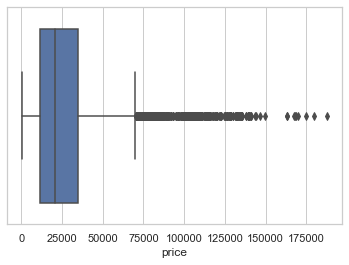

In [712]:
sns.boxplot(x= 'price' ,data=df);

In [713]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
year,12380,2014,6,1997,2010,2015,2018,2022
mileage_km,12380,120952,90430,1,47472,112204,177729,827190
price,12380,27493,23718,600,11419,20495,34900,187630


In [714]:
df.loc[df.year < 2018].describe().T

,count,mean,std,min,25%,50%,75%,max
year,9037,2011,5,1997,2008,2012,2015,2017
mileage_km,9037,156257,78641,1,97992,144349,200700,827190
price,9037,17045,10567,600,8900,15950,22699,168500


In [715]:
index_ = 1956
X_deneme = X.loc[[index_], : ]

print('Predictions',lasso_tuned.predict(X_deneme))

print('4- LASSO_Tunned test hata = ',np.sqrt(mean_squared_error(df.loc[X_deneme.index].price, lasso_tuned.predict(X_deneme))))

Predictions [16103.19947664]
4- LASSO_Tunned test hata =  6108.1994766406715


In [717]:
df.loc[df.make_model == 'BMW-X5'][:5]

,make_model,year,mileage_km,price,Gearbox,fuel_type
1854,BMW-X5,2003,346460,4395,Automatic,Gasoline
1855,BMW-X5,2008,199895,18950,Automatic,Gasoline
1864,BMW-X5,2002,189884,10950,Automatic,Gasoline
1865,BMW-X5,2002,214564,10950,Automatic,Gasoline
1879,BMW-X5,2014,298312,23950,Automatic,Gasoline


# 03.ML - GBM 

In [718]:
from sklearn.ensemble import GradientBoostingRegressor

In [832]:
X_train, X_test, y_train, y_test = train_test_split(X, y, 
                                                    test_size=0.25, 
                                                    random_state=42)

gbm_model =  GradientBoostingRegressor()
gbm_model.fit(X_train, y_train)

y_pred = gbm_model.predict(X_test)
print('GBM hata : ', np.sqrt(mean_squared_error(y_test, y_pred)))

gbm_params = {
            'learning_rate' :[0.01, 0.1],
            'max_depth': [50,100],
            'n_estimators': [100],
            'subsample': [1, 0.5],}

#gbm = GradientBoostingRegressor()
#gbm_cv_model =  GridSearchCV(gbm, gbm_params, cv=5, n_jobs=-1, verbose=2)
#gbm_cv_model.fit(X_train, y_train)

#gbm_cv_model.best_params_

gbm_tuned = GradientBoostingRegressor()

gbm_tuned = GradientBoostingRegressor ( learning_rate= 0.1,
                                       max_depth= 100,
                                       n_estimators= 100,
                                       subsample= 0.5)

gbm_tuned = gbm_tuned.fit(X_train, y_train)

y_pred =  gbm_tuned.predict(X_test)
print('GBM_Tuned Hata :', np.sqrt(mean_squared_error(y_test, y_pred)))

6057.215308635827
GBM_Tuned Hata : 4698.317000232478


In [727]:
Importance = pd.DataFrame({'Importance': gbm_tuned.feature_importances_*100},
                         index = X_train.columns)

Text(0.5, 0, 'Importance of features')

<Figure size 2880x2880 with 0 Axes>

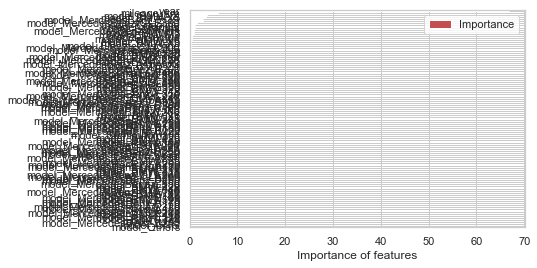

In [728]:
plt.figure(figsize=(40,40))
Importance.sort_values(by = 'Importance',
                      axis=0,
                      ascending= True).plot(kind ='barh', color='r')

plt.xlabel('Importance of features')

In [729]:
Importance.sort_values(by = 'Importance',
                      axis=0,
                      ascending= True).index

Index(['model_Others', 'model_CNG', 'model_MercedesBenz-E240', 'model_LPG',
       'model_BMW-328', 'model_MercedesBenz-E320', 'model_BMW-418',
       'model_MercedesBenz-CLK200', 'model_BMW-523', 'model_MercedesBenz-A150',
       ...
       'model_MercedesBenz-Others', 'model_BMW-M4', 'model_Manual',
       'model_Gasoline', 'model_MercedesBenz-GLE350', 'model_MercedesBenz-EQS',
       'model_BMW-X5', 'model_BMW-iX', 'mileage_km', 'year'],
      dtype='object', length=104)

# Pipeline gbm_tuned

In [750]:
from sklearn.compose import make_column_transformer
from sklearn.preprocessing import OneHotEncoder
from sklearn.pipeline import make_pipeline
from sklearn.model_selection import cross_val_score

In [837]:
df.head(2)

,make_model,year,mileage_km,price,Gearbox,fuel_type
0,BMW-316,2001,231339,1450,Automatic,Gasoline
1,BMW-320,2016,105267,22490,Automatic,Gasoline


In [838]:
X = df.drop('price',axis='columns')
y = df.price

In [839]:
X_train, X_test, y_train, y_test = train_test_split(X, y, 
                                                    test_size=0.25, 
                                                    random_state=42)

In [840]:
column_trans = make_column_transformer(
    (OneHotEncoder(), ['make_model', 'Gearbox', 'fuel_type']),
    remainder = 'passthrough')

In [841]:
column_trans.fit_transform(X)

<12380x104 sparse matrix of type '<class 'numpy.float64'>'
	with 61900 stored elements in Compressed Sparse Row format>

In [843]:
pipe = make_pipeline(column_trans, gbm_tuned)

In [807]:
cross_val_score(pipe, X_train, y_train, cv=5, scoring='neg_mean_squared_error' )

array([               nan, -22733669.98635317, -23624880.0311954 ,
       -27439664.82987525, -33718297.94246234])

In [844]:
X_new = X_test.sample(3, random_state=99)
print(df.loc[X_new.index, :])

                make_model  year  mileage_km  price    Gearbox fuel_type
11414  MercedesBenz-GLE350  2015      139631  45040  Automatic    Diesel
3053               BMW-530  2003      247000   4200  Automatic  Gasoline
11641    MercedesBenz-E320  2004      466015   3799  Automatic    Diesel


In [845]:
pipe.fit(X_train, y_train)
# pipe.predict(X_new) 

np.around(pipe.predict(X_new) , 0)

array([47812.,  4784.,  3681.])

In [846]:
y_pred =  pipe.predict(X_new)
y_test = df.loc[X_new.index, :].price
np.sqrt(mean_squared_error(y_test, y_pred))

1636.9194345601518

# Pipeline XGBoost

In [891]:
#!pip install xgboost
import xgboost as xgb
xgb.set_config(verbosity=2)

In [892]:
#DM_train = xgb.DMatrix(data= X_train, label = y_train)
#DM_test = xgb.DMatrix(data= X_test, label = y_test)

from xgboost import XGBRegressor
xgb_model = XGBRegressor()
xgb_model

XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, gamma=None,
             gpu_id=None, grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=None, max_bin=None,
             max_cat_to_onehot=None, max_delta_step=None, max_depth=None,
             max_leaves=None, min_child_weight=None, missing=nan,
             monotone_constraints=None, n_estimators=100, n_jobs=None,
             num_parallel_tree=None, predictor=None, random_state=None,
             reg_alpha=None, reg_lambda=None, ...)

In [894]:
xgb_model.params

AttributeError: 'XGBRegressor' object has no attribute 'params_'

In [884]:
X = df.drop('price',axis='columns')
X[['make_model', 'Gearbox', 'fuel_type']] = X[['make_model', 'Gearbox', 'fuel_type']].astype('category')
y = df.price

X_train, X_test, y_train, y_test = train_test_split(X, y, 
                                                    test_size=0.25, 
                                                    random_state=42)

In [885]:
X.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 12380 entries, 0 to 13955
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype   
---  ------      --------------  -----   
 0   make_model  12380 non-null  category
 1   year        12380 non-null  float64 
 2   mileage_km  12380 non-null  float64 
 3   Gearbox     12380 non-null  category
 4   fuel_type   12380 non-null  category
dtypes: category(3), float64(2)
memory usage: 587.7 KB


In [890]:
xgb_model = XGBRegressor()
xgb_model

XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, gamma=None,
             gpu_id=None, grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=None, max_bin=None,
             max_cat_to_onehot=None, max_delta_step=None, max_depth=None,
             max_leaves=None, min_child_weight=None, missing=nan,
             monotone_constraints=None, n_estimators=100, n_jobs=None,
             num_parallel_tree=None, predictor=None, random_state=None,
             reg_alpha=None, reg_lambda=None, ...)

In [888]:
xgb_model = XGBRegressor(enable_categorical=True)
xgb_model.fit(X_train, y_train)

ValueError: Experimental support for categorical data is not implemented for current tree method yet.

### Compare ML Models X_new

In [863]:
X = df.drop('price',axis='columns')
y = df.price

X_train, X_test, y_train, y_test = train_test_split(X, y, 
                                                    test_size=0.25, 
                                                    random_state=42)


list_ml = [knn_tuned, lasso_tuned, gbm_tuned]

column_trans = make_column_transformer(
    (OneHotEncoder(), ['make_model', 'Gearbox', 'fuel_type']),
    remainder = 'passthrough')

#pipe = make_pipeline(column_trans, clf)

for clf in list_ml:
    X_new = X_test.sample(100, random_state=99)
    
    pipe = make_pipeline(column_trans, clf)
    pipe.fit(X_train, y_train)
    
    y_pred =  pipe.predict(X_new)
    y_test = df.loc[X_new.index, :].price

    print(clf, np.sqrt(mean_squared_error(y_test, y_pred)))

KNeighborsRegressor(n_neighbors=8) 17206.888806925737
Lasso(alpha=0.1, normalize=True) 9073.785525910827
GradientBoostingRegressor(max_depth=100, subsample=0.5) 3854.146112272517


### Compare ML Models  X_test

In [857]:
df.head(1)

,make_model,year,mileage_km,price,Gearbox,fuel_type
0,BMW-316,2001,231339,1450,Automatic,Gasoline


In [860]:
X = df.drop('price',axis='columns')
y = df.price

X_train, X_test, y_train, y_test = train_test_split(X, y, 
                                                    test_size=0.25, 
                                                    random_state=42)

list_ml = [knn_tuned, lasso_tuned, gbm_tuned]

column_trans = make_column_transformer(
    (OneHotEncoder(handle_unknown='ignore'), ['make_model', 'Gearbox', 'fuel_type']),
    remainder = 'passthrough')

#pipe = make_pipeline(column_trans, clf)

for clf in list_ml:
    
    pipe = make_pipeline(column_trans, clf)
    pipe.fit(X_train, y_train)
    
    y_pred =  pipe.predict(X_test)

    print(clf, np.sqrt(mean_squared_error(y_test, y_pred)))

KNeighborsRegressor(n_neighbors=8) 13131.889523373213
Lasso(alpha=0.1, normalize=True) 7760.112813133781
GradientBoostingRegressor(max_depth=100, subsample=0.5) 4600.630401903279


### Price Null Prediction

In [536]:
#price_null.drop('year', axis=1, inplace=True)
price_null.head(1)

,location,make,model,short_description,price,mileage_km,registration,fuel_type,seller,body_type,type,drivetrain,seats,doors,country_version,offer_number,warranty_months,first_registration,production_date,general_inspection,last_service,full_service_history,non_smoker_vehicle,previous_owner,last_timing_belt_change,Gearbox,engine_size_cc,gears,cylinders,empty_weight_kg,Fuel_type,fuel_consumption,co2_emissions_g_km_comb,emission_class,emissions_sticker,Comfort & Convenience,Entertainment & Media,Safety & Security,extras,colour,manufacturer_color,paint,upholstery_colour,upholstery,power_kw,power_hp
54,OSS,Audi,A1,1.4 TFSI Sport S-Tronic 2x S-LINE NAVI BT XENO...,NaN,99230,2016-09-01,Gasoline,Dealer,Compact,Used,Front,4,3,None,AVM2979,NaN,09/2016,None,09/2022,None,Yes,None,Noe,Noe,Automatic,1395,None,4,1090,Super95,5l100kmcomb62l100kmcity43l100kmcoutry,113,Euro6,None,"'Air conditioning', 'Armrest', 'Automatic clim...","'CD player', 'MP3', 'On-board computer', 'Radio'","'ABS', 'Alarm system', 'Bi-Xenon headlights', ...","'Alloy wheels (17"")', 'Automatically dimming i...",Black,None,Metallic,Black,Partleather,93,126


In [537]:
price_null.registration = pd.to_datetime(price_null.registration, format= '%m/%Y', errors= 'coerce')
price_null.insert(4, 'year', price_null.registration.dt.year, True )

price_null_deneme = price_null.loc[: , ['make' , 'model', 'year', 'price', 'mileage_km', 'fuel_type']]
price_null_deneme.insert(0, 'make_model', (price_null_deneme['make'].astype(str) +"-"+ price_null_deneme["model"].astype(str)), True)
price_null_deneme = price_null_deneme.loc[: , ['make', 'make_model', 'year', 'price', 'mileage_km', 'fuel_type']]

price_null_deneme = price_null_deneme.loc[(price_null_deneme.make == 'BMW') | (price_null_deneme.make == 'MercedesBenz'), : ]
price_null_deneme.drop('make', axis=1, inplace=True)
price_null_deneme.head()

,make_model,year,price,mileage_km,fuel_type
6418,BMW-118,2017,NaN,99889,Gasoline
6436,BMW-535,2010,NaN,141288,Gasoline
6442,BMW-320,2013,NaN,168723,Gasoline
6445,BMW-118,2016,NaN,104264,Gasoline
6458,BMW-335,2013,NaN,168661,Gasoline


In [539]:
price_null_deneme = price_null_deneme[['make_model', 'fuel_type', 'year', 'price', 'mileage_km']]
price_null_deneme.head()

,make_model,fuel_type,year,price,mileage_km
6418,BMW-118,Gasoline,2017,NaN,99889
6436,BMW-535,Gasoline,2010,NaN,141288
6442,BMW-320,Gasoline,2013,NaN,168723
6445,BMW-118,Gasoline,2016,NaN,104264
6458,BMW-335,Gasoline,2013,NaN,168661


In [ ]:
price_null_deneme[]

In [580]:
list_unknown_categories = ['MercedesBenz-E500', 'MercedesBenz-ML300', 'MercedesBenz-CL600', 'MercedesBenz-GLE53AMG', 'BMW-X3M', 'MercedesBenz-CLC', 'MercedesBenz-CLS320',
                           'MercedesBenz-GL420', 'BMW-240', 'MercedesBenz-C240', 'BMW-323', 'BMW-528', 'BMW-430', 'MercedesBenz-SL350', 'BMW-Others', 'BMW-518', 
                           'MercedesBenz-CLK320', 'MercedesBenz-C230', 'MercedesBenz-S400', 'BMW-Z4M', 'MercedesBenz-GLK350', 'MercedesBenz-GLE450', 'MercedesBenz-SLK55AMG',
                           'MercedesBenz-E280', 'BMW-750', 'MercedesBenz-CL500', 'BMW-X6M', 'BMW-440', 'MercedesBenz-SLK350', 'MercedesBenz-S500', 'MercedesBenz-CLK',
                           'BMW-340', 'BMW-630', 'BMW-760', 'MercedesBenz-CLS250', 'MercedesBenz-GLK200', 'BMW-M5', 'MercedesBenz-Viano', 'MercedesBenz-E400', 
                           'MercedesBenz-GL320', 'MercedesBenz-A220', 'BMW-214']
pipe.fit(X_train, y_train)
prediction = pipe.predict(price_null_deneme.loc[~price_null_deneme.make_model.isin(list_unknown_categories)])
prediction

array([ 22116.15639432,  20575.34491639,  14825.92010352,  18720.31927493,
        20046.44711295,  23837.85638874,  16337.23308209,   5473.44882059,
        11278.11029068,   8022.45151644,  12255.54180299,   7406.86198265,
         7937.77393994,   7818.58308919,   6786.09325602,   5684.85295699,
         4938.87743442,   5692.36636892,   5113.27791393,  19014.5329449 ,
         4594.32129478,  15765.22978832,  23107.6821438 ,  26721.37807528,
        19757.80764011,  10320.09128896,  19430.87715396,   9188.82094539,
        12652.699781  ,  17221.4354007 ,  14106.6581737 ,   9225.77509984,
         9613.01716259,   5318.58271106,  20692.81323092,  12577.61077166,
        15082.31931815,  14578.14055113,  10482.7840978 ,   6353.12504219,
         7091.57301604,  25409.81090499,  17090.29048654,  12469.39232675,
         8889.9575601 ,  25990.70428788,  27305.68948475,  14466.00476499,
        15925.34349876,   4991.21208424,   5693.24949953,  16242.57751064,
        54412.96842995,  

In [577]:
index01 = price_null_deneme.loc[~price_null_deneme.make_model.isin(list_unknown_categories)].index
index01

Int64Index([ 6418,  6436,  6442,  6445,  6458,  6461,  6473,  6529,  6574,
             6578,
            ...
            24297, 24311, 24517, 24530, 24533, 24685, 24978, 25263, 25289,
            25474],
           dtype='int64', length=290)

In [609]:
i = 6473
model = price_null_deneme.loc[i].make_model
fuel = price_null_deneme.loc[i].fuel_type
year = price_null_deneme.loc[i].year
mileage = price_null_deneme.loc[i].mileage_km
df.loc[(df.make_model == model) &
      (df.fuel_type == fuel) &
      (df.year == year) &
      (df.mileage_km >= (mileage - 10000)) & (df.mileage_km <= mileage + 10000 )]


,make_model,fuel_type,year,price,mileage_km
1490,BMW-320,Gasoline,2013,15995,149523
2375,BMW-320,Gasoline,2013,17945,137431
2439,BMW-320,Gasoline,2013,16999,142406
2577,BMW-320,Gasoline,2013,14950,146074
3414,BMW-320,Gasoline,2013,13500,153271
3416,BMW-320,Gasoline,2013,14999,146233
3417,BMW-320,Gasoline,2013,14950,138293
3523,BMW-320,Gasoline,2013,12650,143500


### Join DF and Prediction

In [610]:
df_01 = price_null_deneme.loc[index01]
df_pre = pd.DataFrame({'Prediction' : prediction})
df_new = df_01.set_index(df_01.index).join(df_pre.set_index(df_01.index))
df_new.head(10)

,make_model,fuel_type,year,price,mileage_km,Prediction
6418,BMW-118,Gasoline,2017,NaN,99889,22116
6436,BMW-535,Gasoline,2010,NaN,141288,20575
6442,BMW-320,Gasoline,2013,NaN,168723,14826
6445,BMW-118,Gasoline,2016,NaN,104264,18720
6458,BMW-335,Gasoline,2013,NaN,168661,20046
6461,BMW-420,Gasoline,2014,NaN,151941,23838
6473,BMW-320,Gasoline,2013,NaN,144193,16337
6529,BMW-118,Gasoline,2006,NaN,162355,5473
6574,BMW-118,Gasoline,2012,NaN,184384,11278
6578,BMW-118,Gasoline,2011,NaN,159250,8022


In [617]:
df_new.columns

Index(['make_model', 'fuel_type', 'year', 'price', 'mileage_km', 'Prediction'], dtype='object')

In [619]:
df_mer_bmw.loc[[6418], ['make_model', 'fuel_type', 'year', 'price', 'mileage_km', 'Gearbox']]

,make_model,fuel_type,year,price,mileage_km,Gearbox
6418,BMW-X5,ElectricGasoline,2016,39950,111611,Automatic


# Price Null Prediction

In [451]:
price_null.head(1)

,location,make,model,short_description,year,price,mileage_km,registration,fuel_type,seller,body_type,type,drivetrain,seats,doors,country_version,offer_number,warranty_months,first_registration,production_date,general_inspection,last_service,full_service_history,non_smoker_vehicle,previous_owner,last_timing_belt_change,Gearbox,engine_size_cc,gears,cylinders,empty_weight_kg,Fuel_type,fuel_consumption,co2_emissions_g_km_comb,emission_class,emissions_sticker,Comfort & Convenience,Entertainment & Media,Safety & Security,extras,colour,manufacturer_color,paint,upholstery_colour,upholstery,power_kw,power_hp
54,OSS,Audi,A1,1.4 TFSI Sport S-Tronic 2x S-LINE NAVI BT XENO...,2016,NaN,99230,2016-09-01,Gasoline,Dealer,Compact,Used,Front,4,3,None,AVM2979,NaN,09/2016,None,09/2022,None,Yes,None,Noe,Noe,Automatic,1395,None,4,1090,Super95,5l100kmcomb62l100kmcity43l100kmcoutry,113,Euro6,None,"'Air conditioning', 'Armrest', 'Automatic clim...","'CD player', 'MP3', 'On-board computer', 'Radio'","'ABS', 'Alarm system', 'Bi-Xenon headlights', ...","'Alloy wheels (17"")', 'Automatically dimming i...",Black,None,Metallic,Black,Partleather,93,126


In [452]:
price_null.registration = pd.to_datetime(price_null.registration, format= '%m/%Y', errors= 'coerce')
#price_null.insert(4, 'year', price_null.registration.dt.year, True )
price_null.head(1)

,location,make,model,short_description,year,price,mileage_km,registration,fuel_type,seller,body_type,type,drivetrain,seats,doors,country_version,offer_number,warranty_months,first_registration,production_date,general_inspection,last_service,full_service_history,non_smoker_vehicle,previous_owner,last_timing_belt_change,Gearbox,engine_size_cc,gears,cylinders,empty_weight_kg,Fuel_type,fuel_consumption,co2_emissions_g_km_comb,emission_class,emissions_sticker,Comfort & Convenience,Entertainment & Media,Safety & Security,extras,colour,manufacturer_color,paint,upholstery_colour,upholstery,power_kw,power_hp
54,OSS,Audi,A1,1.4 TFSI Sport S-Tronic 2x S-LINE NAVI BT XENO...,2016,NaN,99230,2016-09-01,Gasoline,Dealer,Compact,Used,Front,4,3,None,AVM2979,NaN,09/2016,None,09/2022,None,Yes,None,Noe,Noe,Automatic,1395,None,4,1090,Super95,5l100kmcomb62l100kmcity43l100kmcoutry,113,Euro6,None,"'Air conditioning', 'Armrest', 'Automatic clim...","'CD player', 'MP3', 'On-board computer', 'Radio'","'ABS', 'Alarm system', 'Bi-Xenon headlights', ...","'Alloy wheels (17"")', 'Automatically dimming i...",Black,None,Metallic,Black,Partleather,93,126


In [456]:
#price_null_deneme.insert(0, 'make_model', (price_null_deneme['make'].astype(str) +"-"+ price_null_deneme["model"].astype(str)), True)
#price_null_deneme.drop(['make', 'model'], axis=1, inplace=True)
price_null_deneme.head(2)

,make_model,year,price,mileage_km,fuel_type
6442,BMW-320,2013,NaN,168723,Gasoline
6473,BMW-320,2013,NaN,144193,Gasoline


In [453]:

price_null_deneme = price_null.loc[: , ['make-model', 'year', 'price', 'mileage_km', 'fuel_type']]
price_null_deneme.head()

KeyError: "['make-model'] not in index"

In [396]:
price_null_deneme = price_null_deneme.loc[(price_null_deneme.make == 'BMW') | (price_null_deneme.make == 'MercedesBenz'),['make', 'model', 'year','price', 'mileage_km', 'fuel_type']]
price_null_deneme.head(2)

,make,model,year,price,mileage_km,fuel_type
6418,BMW,118,2017,NaN,99889,Gasoline
6436,BMW,535,2010,NaN,141288,Gasoline


In [397]:
price_null_deneme = price_null_deneme.loc[price_null_deneme.model == '320']
price_null_deneme.head(2)

,make,model,year,price,mileage_km,fuel_type
6442,BMW,320,2013,NaN,168723,Gasoline
6473,BMW,320,2013,NaN,144193,Gasoline


In [400]:
p_dms = pd.get_dummies(price_null_deneme[['make', 'model', 'fuel_type']], prefix='new')
p_dms.head(1)

,new_BMW,new_320,new_Diesel,new_ElectricGasoline,new_Gasoline
6442,1,1,0,0,1


In [401]:
p_dms = pd.get_dummies(price_null_deneme[['make', 'model', 'fuel_type']], prefix='new')
p_X_ = price_null_deneme.drop(['price', 'make', 'model', 'fuel_type'], axis='columns').astype('float64')
p_X = pd.concat([p_X_, p_dms[list(p_dms.columns)]], axis=1)
p_X.head(1)

,year,mileage_km,new_BMW,new_320,new_Diesel,new_ElectricGasoline,new_Gasoline
6442,2013,168723,1,1,0,0,1


## Check Different Model and Make

In [302]:
price_null_deneme.make.value_counts()

BMW             221
Volkswagen      165
Volvo           148
Audi            144
MercedesBenz    121
Renault          93
Peugeot          85
Ford             70
Fiat             66
Citroen          62
Toyota           59
Hyundai          58
Opel             55
Skoda            45
Kia              40
Mazda            29
Honda            26
Dacia            18
Chevrolet        12
Tesla             6
Name: make, dtype: int64

In [247]:
def convert(df2):
    global df
    #df2 = pd.DataFrame({'make': df2.make.values ,
     #              'model': df2.model.values,
      #             'price': df2.price.values,
       #            'mileage_km': df2.mileage_km.values,
        #           'fuel_type': df2.fuel_type.values} )
    df = df.append(df2, ignore_index= True)
    print(df.tail())
    dms = pd.get_dummies(df[['make', 'model', 'fuel_type']], prefix='new')
    X_ = df.drop(['price', 'make', 'model', 'fuel_type'], axis=1).astype('float64')
    X = pd.concat([X_, dms[list(dms.columns)]], axis=1)
    print(X.mileage_km.iloc[-1]
    return gbm_tuned.predict(X.iloc[-1])

In [264]:
convert(null_deneme)

               make model  year  price  mileage_km fuel_type
12132  MercedesBenz  B200  2010  12950       76408       LPG
12133  MercedesBenz  B180   NaN    NaN       96922  Gasoline
12134  MercedesBenz  B180   NaN    NaN       96922  Gasoline
12135  MercedesBenz  B180   NaN    NaN       96922  Gasoline
12136  MercedesBenz  B180   NaN    NaN       96922  Gasoline


ValueError: Expected 2D array, got 1D array instead:
array=[       nan 9.6922e+04 0.0000e+00 1.0000e+00 0.0000e+00 0.0000e+00
 0.0000e+00 0.0000e+00 0.0000e+00 0.0000e+00 0.0000e+00 0.0000e+00
 0.0000e+00 0.0000e+00 0.0000e+00 0.0000e+00 0.0000e+00 0.0000e+00
 0.0000e+00 0.0000e+00 0.0000e+00 0.0000e+00 0.0000e+00 0.0000e+00
 0.0000e+00 0.0000e+00 0.0000e+00 0.0000e+00 0.0000e+00 0.0000e+00
 0.0000e+00 0.0000e+00 0.0000e+00 0.0000e+00 0.0000e+00 0.0000e+00
 0.0000e+00 0.0000e+00 0.0000e+00 0.0000e+00 1.0000e+00 0.0000e+00
 0.0000e+00 0.0000e+00 0.0000e+00 0.0000e+00 0.0000e+00 0.0000e+00
 0.0000e+00 0.0000e+00 0.0000e+00 0.0000e+00 0.0000e+00 0.0000e+00
 0.0000e+00 0.0000e+00 0.0000e+00 0.0000e+00 0.0000e+00 0.0000e+00
 0.0000e+00 0.0000e+00 0.0000e+00 0.0000e+00 0.0000e+00 0.0000e+00
 0.0000e+00 0.0000e+00 0.0000e+00 0.0000e+00 0.0000e+00 0.0000e+00
 0.0000e+00 0.0000e+00 0.0000e+00 0.0000e+00 0.0000e+00 0.0000e+00
 0.0000e+00 0.0000e+00 0.0000e+00 0.0000e+00 0.0000e+00 0.0000e+00
 0.0000e+00 0.0000e+00 0.0000e+00 0.0000e+00 0.0000e+00 0.0000e+00
 0.0000e+00 0.0000e+00 0.0000e+00 0.0000e+00 0.0000e+00 0.0000e+00
 0.0000e+00 1.0000e+00 0.0000e+00].
Reshape your data either using array.reshape(-1, 1) if your data has a single feature or array.reshape(1, -1) if it contains a single sample.

In [274]:
X.tail(1)

,year,mileage_km,new_BMW,new_MercedesBenz,new_116,new_118,new_120,new_216,new_218,new_220,new_225,new_316,new_318,new_320,new_325,new_328,new_330,new_335,new_418,new_420,new_428,new_435,new_520,new_523,new_525,new_530,new_535,new_640,new_650,new_730,new_740,new_A150,new_A160,new_A170,new_A180,new_A200,new_A250,new_A45AMG,new_B160,new_B170,new_B180,new_B200,new_B250,new_C180,new_C200,new_C220,new_C250,new_C300,new_C350,new_CLA180,new_CLA200,new_CLA250,new_CLK200,new_CLS350,new_Citan,new_E200,new_E220,new_E240,new_E250,new_E300,new_E320,new_E350,new_EQC400,new_EQS,new_GLA180,new_GLA200,new_GLA250,new_GLA45AMG,new_GLC220,new_GLC250,new_GLC300,new_GLC350,new_GLE350,new_M3,new_M4,new_ML320,new_ML350,new_S350,new_SL500,new_SLK200,new_Sprinter,new_Vito,new_X1,new_X2,new_X3,new_X5,new_X6,new_Z3,new_Z4,new_i3,new_i4,new_iX,new_iX3,new_Diesel,new_Electric,new_ElectricDiesel,new_ElectricGasoline,new_Gasoline,new_LPG
13953,2010,76408,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1


In [267]:
X.shape

(12133, 99)

In [292]:
price_null.registration = pd.to_datetime(price_null.registration, format= '%m/%Y', errors= 'coerce')
price_null.insert(4, 'year', price_null.registration.dt.year, True )
price_null.head(1)

,location,make,model,short_description,year,year,year,year,year,year,year,year,year,year,price,mileage_km,registration,fuel_type,seller,body_type,type,drivetrain,seats,doors,country_version,offer_number,warranty_months,first_registration,production_date,general_inspection,last_service,full_service_history,non_smoker_vehicle,previous_owner,last_timing_belt_change,Gearbox,engine_size_cc,gears,cylinders,empty_weight_kg,Fuel_type,fuel_consumption,co2_emissions_g_km_comb,emission_class,emissions_sticker,Comfort & Convenience,Entertainment & Media,Safety & Security,extras,colour,manufacturer_color,paint,upholstery_colour,upholstery,power_kw,power_hp
54,OSS,Audi,A1,1.4 TFSI Sport S-Tronic 2x S-LINE NAVI BT XENO...,2016,2016,2016,2016,2016,2016,2016,2016,2016,2016,NaN,99230,2016-09-01,Gasoline,Dealer,Compact,Used,Front,4,3,None,AVM2979,NaN,09/2016,None,09/2022,None,Yes,None,Noe,Noe,Automatic,1395,None,4,1090,Super95,5l100kmcomb62l100kmcity43l100kmcoutry,113,Euro6,None,"'Air conditioning', 'Armrest', 'Automatic clim...","'CD player', 'MP3', 'On-board computer', 'Radio'","'ABS', 'Alarm system', 'Bi-Xenon headlights', ...","'Alloy wheels (17"")', 'Automatically dimming i...",Black,None,Metallic,Black,Partleather,93,126


In [291]:
#null_deneme = price_null.loc[[21854] , ['make', 'model', 'year', 'price', 'mileage_km', 'fuel_type']]
null_deneme.drop('year', axis=1, inplace=True)
null_deneme

,make,model,price,mileage_km,fuel_type
21854,MercedesBenz,B180,NaN,96922,Gasoline


In [ ]:
dms = pd.get_dummies(null_deneme[['make', 'model', 'fuel_type']], prefix='new')
null_X_ = null_deneme.drop(['price', 'make', 'model', 'fuel_type'], axis='columns').astype('float64')
null_y = null_deneme.price
null_X = null_deneme.concat([null_X_, dms[list(dms.columns)]], axis=1)
null_X.head(1)

In [273]:
pd.concat([X.loc[[0]], null_deneme]).head()

,year,mileage_km,new_BMW,new_MercedesBenz,new_116,new_118,new_120,new_216,new_218,new_220,new_225,new_316,new_318,new_320,new_325,new_328,new_330,new_335,new_418,new_420,new_428,new_435,new_520,new_523,new_525,new_530,new_535,new_640,new_650,new_730,new_740,new_A150,new_A160,new_A170,new_A180,new_A200,new_A250,new_A45AMG,new_B160,new_B170,new_B180,new_B200,new_B250,new_C180,new_C200,new_C220,new_C250,new_C300,new_C350,new_CLA180,new_CLA200,new_CLA250,new_CLK200,new_CLS350,new_Citan,new_E200,new_E220,new_E240,new_E250,new_E300,new_E320,new_E350,new_EQC400,new_EQS,new_GLA180,new_GLA200,new_GLA250,new_GLA45AMG,new_GLC220,new_GLC250,new_GLC300,new_GLC350,new_GLE350,new_M3,new_M4,new_ML320,new_ML350,new_S350,new_SL500,new_SLK200,new_Sprinter,new_Vito,new_X1,new_X2,new_X3,new_X5,new_X6,new_Z3,new_Z4,new_i3,new_i4,new_iX,new_iX3,new_Diesel,new_Electric,new_ElectricDiesel,new_ElectricGasoline,new_Gasoline,new_LPG,make,model,price,fuel_type
0,2001,231339,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,NaN,NaN,NaN,NaN
21854,2015,96922,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,MercedesBenz,B180,NaN,Gasoline


,year,mileage_km,new_BMW,new_MercedesBenz,new_116,new_118,new_120,new_216,new_218,new_220,new_225,new_316,new_318,new_320,new_325,new_328,new_330,new_335,new_418,new_420,new_428,new_435,new_520,new_523,new_525,new_530,new_535,new_640,new_650,new_730,new_740,new_A150,new_A160,new_A170,new_A180,new_A200,new_A250,new_A45AMG,new_B160,new_B170,new_B180,new_B200,new_B250,new_C180,new_C200,new_C220,new_C250,new_C300,new_C350,new_CLA180,new_CLA200,new_CLA250,new_CLK200,new_CLS350,new_Citan,new_E200,new_E220,new_E240,new_E250,new_E300,new_E320,new_E350,new_EQC400,new_EQS,new_GLA180,new_GLA200,new_GLA250,new_GLA45AMG,new_GLC220,new_GLC250,new_GLC300,new_GLC350,new_GLE350,new_M3,new_M4,new_ML320,new_ML350,new_S350,new_SL500,new_SLK200,new_Sprinter,new_Vito,new_X1,new_X2,new_X3,new_X5,new_X6,new_Z3,new_Z4,new_i3,new_i4,new_iX,new_iX3,new_Diesel,new_Electric,new_ElectricDiesel,new_ElectricGasoline,new_Gasoline,new_LPG
0,2001,231339,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0


In [272]:
X.loc[[0]]

,year,mileage_km,new_BMW,new_MercedesBenz,new_116,new_118,new_120,new_216,new_218,new_220,new_225,new_316,new_318,new_320,new_325,new_328,new_330,new_335,new_418,new_420,new_428,new_435,new_520,new_523,new_525,new_530,new_535,new_640,new_650,new_730,new_740,new_A150,new_A160,new_A170,new_A180,new_A200,new_A250,new_A45AMG,new_B160,new_B170,new_B180,new_B200,new_B250,new_C180,new_C200,new_C220,new_C250,new_C300,new_C350,new_CLA180,new_CLA200,new_CLA250,new_CLK200,new_CLS350,new_Citan,new_E200,new_E220,new_E240,new_E250,new_E300,new_E320,new_E350,new_EQC400,new_EQS,new_GLA180,new_GLA200,new_GLA250,new_GLA45AMG,new_GLC220,new_GLC250,new_GLC300,new_GLC350,new_GLE350,new_M3,new_M4,new_ML320,new_ML350,new_S350,new_SL500,new_SLK200,new_Sprinter,new_Vito,new_X1,new_X2,new_X3,new_X5,new_X6,new_Z3,new_Z4,new_i3,new_i4,new_iX,new_iX3,new_Diesel,new_Electric,new_ElectricDiesel,new_ElectricGasoline,new_Gasoline,new_LPG
0,2001,231339,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0
